# Machinery

In [ ]:
%run Initialization.ipynb
set_plot_style(False)
data_folder = "../../data/"

%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"]="IPAGothic"
from termcolor import colored

## <font color="orange">Translated names of the prefectures</font>

In [2]:
df_translation = pd.read_excel("../../data/snapshot_hokkaido.xlsx",'Hokkaido_subprefectures').loc[:,['jpn','jpn_short','eng']]
df_translation

,jpn,jpn_short,eng
0,宗谷総合振興局,宗谷,Soya
1,留萌振興局,留萌,Rumoi
2,根室振興局,根室,Nemuro
3,オホーツク総合振興局,オホーツク,Okhotsk
4,上川総合振興局,上川,Kamikawa
5,空知総合振興局,空知,Sorachi
6,釧路総合振興局,釧路,Kushiro
7,石狩振興局,石狩,Ishikari (excl.Sapporo)
8,十勝総合振興局,十勝,Tokachi
9,札幌市,札幌,Sapporo


## <font color="orange">Loading the shape file</font>

In [3]:
filename = data_folder+'/Andrei/shapefiles/N03-19_01_190101.shp'
#layers
lrs = fiona.listlayers(filename)
lrs

['N03-19_01_190101']

In [4]:
gdf = gpd.read_file(filename,layer=lrs[-1], encoding='shift_jis')
gdf[:5]

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((144.08144 44.12506, 144.08143 44.125..."
1,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((143.78333 44.18453, 143.78281 44.183..."
2,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29495 44.00826, 144.29501 44.008..."
3,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29602 44.01118, 144.29572 44.010..."
4,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29266 44.01945, 144.29295 44.018..."


In [5]:
# all districts
gdf.loc[:,'N03_002'].unique()

array(['オホーツク総合振興局', '空知総合振興局', '釧路総合振興局', '後志総合振興局', '根室振興局', '宗谷総合振興局',
       '十勝総合振興局', '上川総合振興局', '石狩振興局', '胆振総合振興局', '渡島総合振興局', '日高振興局',
       '留萌振興局', '檜山振興局'], dtype=object)

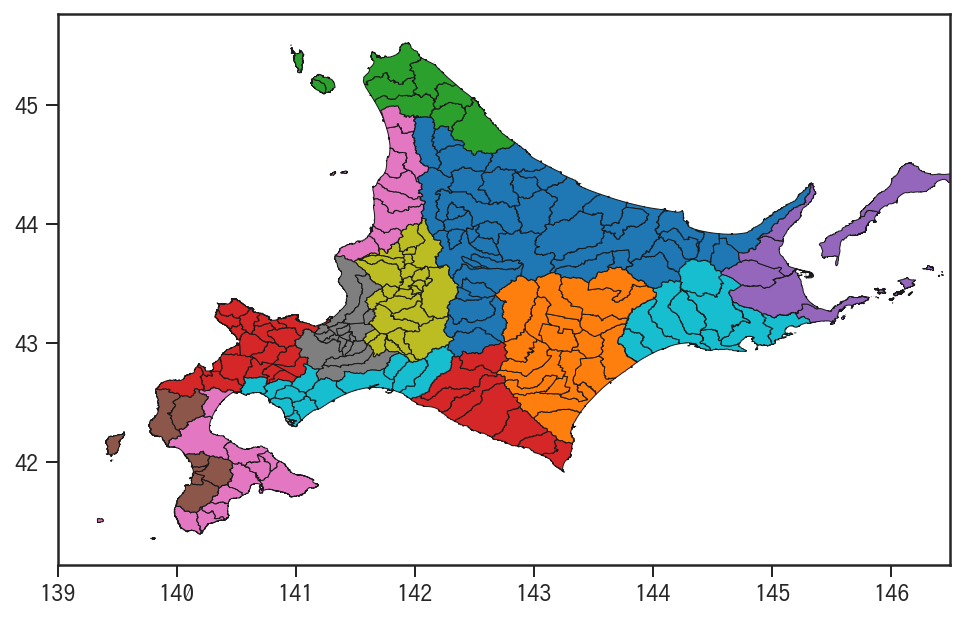

In [6]:
fig, ax = plt.subplots(figsize=(8, 12))
gdf.plot(column='N03_002', ax=ax, edgecolor='k',lw=.5)
ax.set_xlim(139,146.5);

In [7]:
gdf = gdf.drop(['N03_001','N03_003','N03_007'],axis=1)\
    .rename(columns={'N03_002':'subprefecture', 'N03_004':'ward'})
gdf[:5]

,subprefecture,ward,geometry
0,オホーツク総合振興局,北見市,"POLYGON ((144.08144 44.12506, 144.08143 44.125..."
1,オホーツク総合振興局,北見市,"POLYGON ((143.78333 44.18453, 143.78281 44.183..."
2,オホーツク総合振興局,網走市,"POLYGON ((144.29495 44.00826, 144.29501 44.008..."
3,オホーツク総合振興局,網走市,"POLYGON ((144.29602 44.01118, 144.29572 44.010..."
4,オホーツク総合振興局,網走市,"POLYGON ((144.29266 44.01945, 144.29295 44.018..."


In [8]:
# combining Sapporo wards into one unit
札幌市の区s = ['北区','手稲区','西区','中央区','東区','白石区','豊平区','清田区','厚別区','南区']
gdf['subprefecture'] = ['札幌市' if x in 札幌市の区s else y for y,x in zip(gdf.subprefecture.values,gdf.ward.values)]

In [9]:
gdf = gdf.dissolve(by='subprefecture', aggfunc='sum').reset_index().loc[:,['subprefecture','geometry']]
gdf[-5:]

,subprefecture,geometry
10,留萌振興局,"MULTIPOLYGON (((141.32841 43.74073, 141.32840 ..."
11,石狩振興局,"MULTIPOLYGON (((141.28945 43.22872, 141.28939 ..."
12,空知総合振興局,"POLYGON ((142.04358 42.86240, 142.04320 42.862..."
13,胆振総合振興局,"MULTIPOLYGON (((141.00078 42.29937, 141.00079 ..."
14,釧路総合振興局,"MULTIPOLYGON (((144.96157 42.97984, 144.96161 ..."


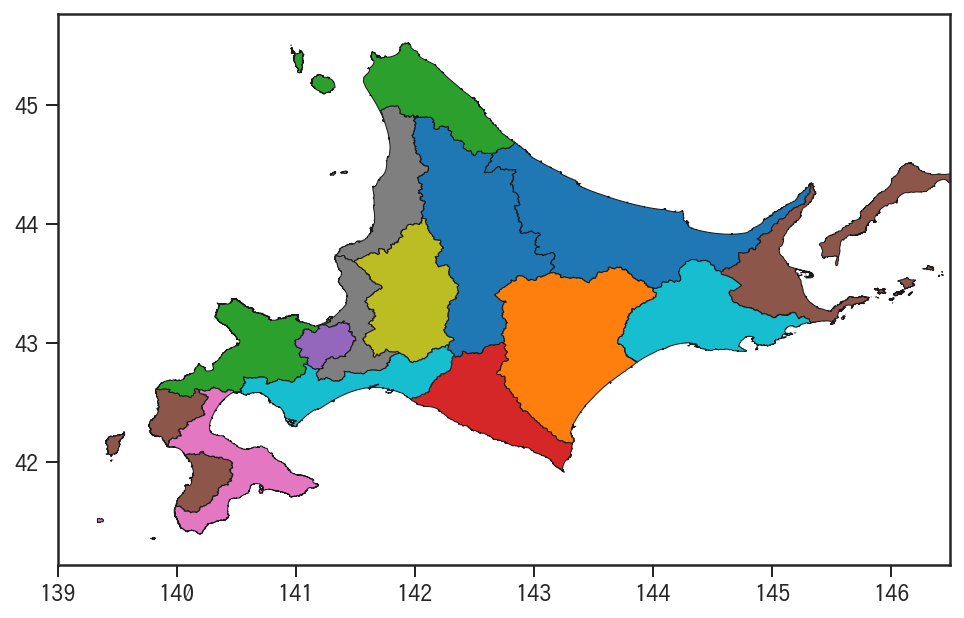

In [10]:
fig, ax = plt.subplots(figsize=(8, 12))
gdf.plot(column='subprefecture', ax=ax, edgecolor='k',lw=.5)
ax.set_xlim(139,146.5);

## <font color="orange">Hokkaido population</font>

In [11]:
Df_pop = pd.read_excel('../../data/Andrei/Hokkaido_pop.xlsx')
Df_pop[-5:]

,Unit,Population
216,町村計,49102
217,別海町,15171
218,中標津町,23493
219,標津町,5347
220,羅臼町,5091


In [12]:
df_pop = Df_pop.loc[lambda d: d.Unit.isin([x for x in Df_pop.Unit if "\u3000" not in x])]
df_pop['Unit'] = [x[:-1] for x in df_pop.Unit]
df_pop

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unit,Population
0,空知総合振興局,293770
27,石狩振興局,2377490
48,後志総合振興局,209584
70,胆振総合振興局,391990
84,日高振興局,66894
92,渡島総合振興局,395365
106,檜山振興局,36168
114,上川総合振興局,495947
140,留萌振興局,45840
150,宗谷総合振興局,63844


In [13]:
Df_pop['Unit'] = [x.replace("\u3000","") for x in Df_pop.Unit]
Df_pop['Unit'] = ['札幌市' if x in 札幌市の区s else x for x in Df_pop.Unit.values]
Df_pop = Df_pop.groupby('Unit').agg(sum).reset_index(drop=False)
Df_pop = Df_pop.loc[Df_pop.Unit=='札幌市']
Df_pop

,Unit,Population
99,札幌市,1955457


In [14]:
df_pop = pd.concat([df_pop,Df_pop])
df_pop.loc[lambda d: d.Unit=='石狩振興局','Population'] = df_pop.loc[lambda d: d.Unit=='石狩振興局','Population'].values[0] - df_pop.loc[lambda d: d.Unit=='札幌市','Population'].values[0]
df_pop

,Unit,Population
0,空知総合振興局,293770
27,石狩振興局,422033
48,後志総合振興局,209584
70,胆振総合振興局,391990
84,日高振興局,66894
92,渡島総合振興局,395365
106,檜山振興局,36168
114,上川総合振興局,495947
140,留萌振興局,45840
150,宗谷総合振興局,63844


In [15]:
gdf['subprefecture'].values

array(['オホーツク総合振興局', '上川総合振興局', '十勝総合振興局', '宗谷総合振興局', '後志総合振興局', '日高振興局',
       '札幌市', '根室振興局', '檜山振興局', '渡島総合振興局', '留萌振興局', '石狩振興局', '空知総合振興局',
       '胆振総合振興局', '釧路総合振興局'], dtype=object)

In [16]:
gdf = gdf.merge(df_pop.rename(columns={'Unit':'subprefecture','Population':'population'}),how='left')
gdf[-5:]

,subprefecture,geometry,population
10,留萌振興局,"MULTIPOLYGON (((141.32841 43.74073, 141.32840 ...",45840
11,石狩振興局,"MULTIPOLYGON (((141.28945 43.22872, 141.28939 ...",422033
12,空知総合振興局,"POLYGON ((142.04358 42.86240, 142.04320 42.862...",293770
13,胆振総合振興局,"MULTIPOLYGON (((141.00078 42.29937, 141.00079 ...",391990
14,釧路総合振興局,"MULTIPOLYGON (((144.96157 42.97984, 144.96161 ...",230748


In [17]:
gdf.loc[lambda d: d.subprefecture=='札幌市']

,subprefecture,geometry,population
6,札幌市,"POLYGON ((141.09830 43.11764, 141.09985 43.116...",1955457


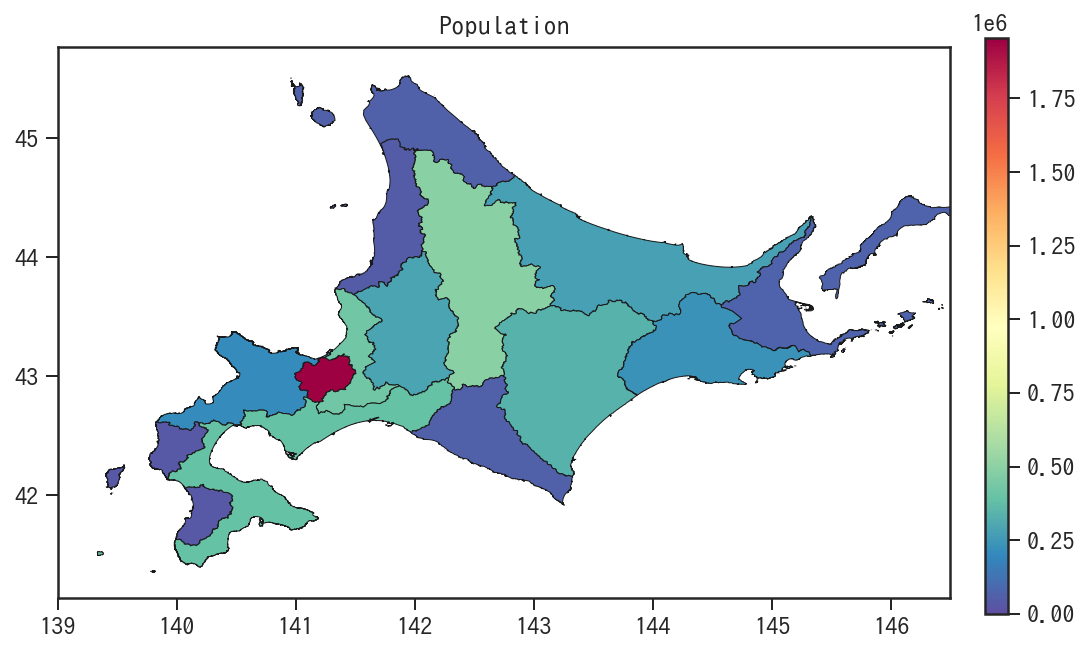

In [18]:
fig, ax = plt.subplots(figsize=(8, 10))

clr_plt = 'Spectral_r'
vmax = np.max(gdf['population'])
gdf.loc[lambda d: d.population>0].plot(column='population', ax=ax, edgecolor='k', lw=.5, cmap = clr_plt, 
         categorical=False, legend=False, vmin=0, vmax=vmax,
         legend_kwds={'loc': 'lower right'})
ax.set_title('Population');

cax = fig.add_axes([.93, 0.3, 0.02, 0.4])
sm = plt.cm.ScalarMappable(cmap=clr_plt, norm=plt.Normalize(vmin=0, vmax=vmax)); sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
ax.set_xlim(139,146.5);

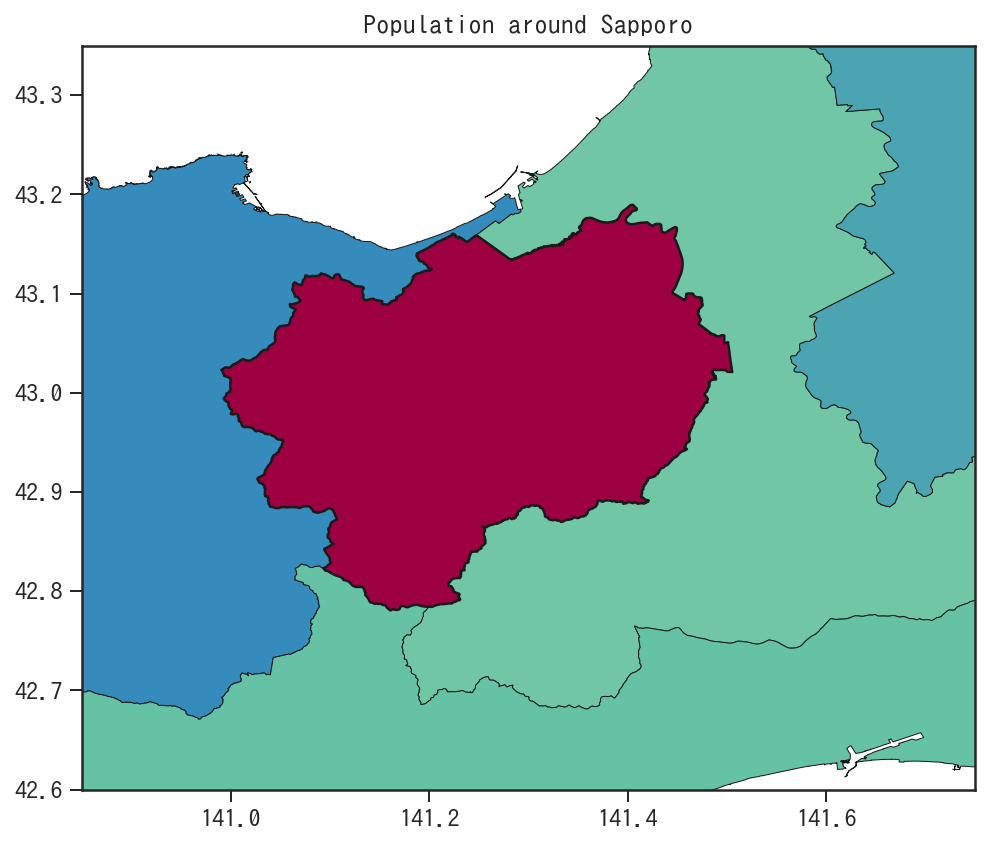

In [19]:
fig, ax = plt.subplots(figsize=(8, 10))

vmax = np.max(gdf['population'])
gdf.loc[lambda d: d.population>0].plot(column='population', ax=ax, edgecolor='k', lw=.5, cmap = clr_plt, 
         categorical=False, legend=False, vmin=0, vmax=vmax,
         legend_kwds={'loc': 'lower right'})
gdf.loc[lambda d: d.subprefecture=='札幌市'].plot(ax=ax, edgecolor='k', lw=1.25, facecolor='none')
ax.set_title('Population around Sapporo');
ax.set_ylim(42.6,43.35);
ax.set_xlim(140.85,141.75);

## <font color="orange">For explanotary reasons - to show the incidence according to **covmap**-website</font>

In [20]:
df_cases = pd.read_excel('../../data/Andrei/covmap_data.xlsx')
df_cases[:2].drop('course',axis=1)

,lat,long,title,link,ID,掲載,発表,感染確定,入院,症状,症状_master,受診_master,感染確定_master,A_ID,死_master
0,35.419992,139.269813,1例目の患者さん,https://www.mhlw.go.jp/stf/newpage_08906.html,1,NaT,2020-01-16,NaT,2020-01-10,2020-01-03,2020-01-03,2020-01-10,2020-01-16,A-001,NaT
1,35.011762,135.767928,3例目の患者さん,https://www.mhlw.go.jp/stf/newpage_09099.html,3,NaT,2020-01-25,2020-01-25,NaT,2020-01-21,2020-01-21,2020-01-23,2020-01-25,A-003,NaT


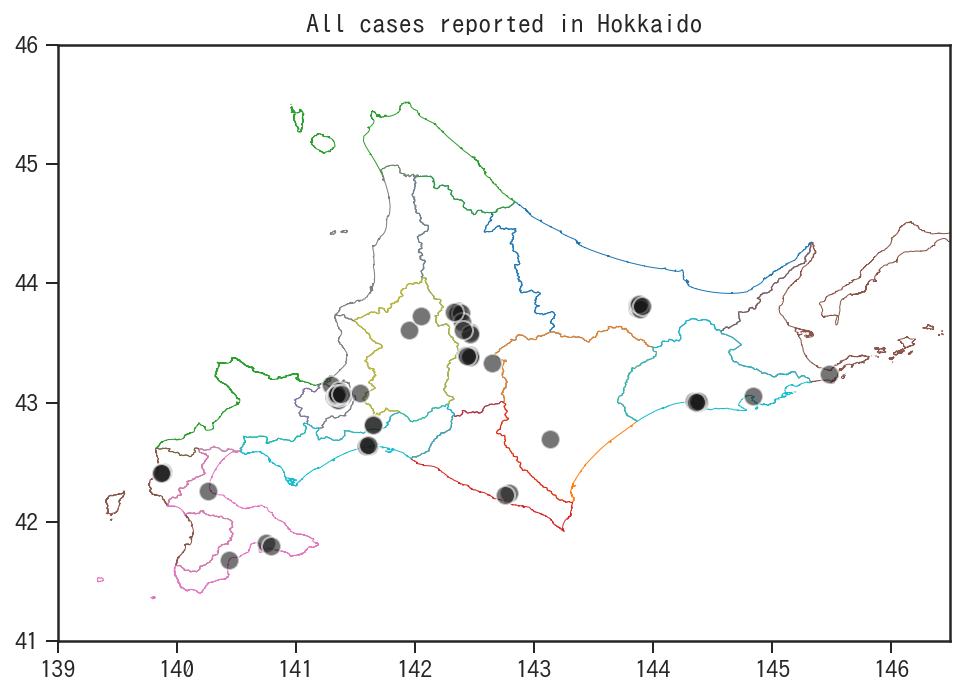

In [21]:
fig, ax = plt.subplots(figsize=(8, 10))
gdf.plot(column='subprefecture', ax=ax, edgecolor='grey', facecolor='none', lw=.5)
ax.scatter(df_cases['long'],df_cases['lat'], alpha=.6, edgecolor='w', facecolor='k', s=90)
ax.set_title('All cases reported in Hokkaido');
ax.set_xlim(139,146.5)
ax.set_ylim(41,46);

In [22]:
gdf_cases = gpd.GeoDataFrame(df_cases, geometry=gpd.points_from_xy(df_cases.long, df_cases.lat))
gdf_cases[:2].drop('course',1)

,lat,long,title,link,ID,掲載,発表,感染確定,入院,症状,症状_master,受診_master,感染確定_master,A_ID,死_master,geometry
0,35.419992,139.269813,1例目の患者さん,https://www.mhlw.go.jp/stf/newpage_08906.html,1,NaT,2020-01-16,NaT,2020-01-10,2020-01-03,2020-01-03,2020-01-10,2020-01-16,A-001,NaT,POINT (139.26981 35.41999)
1,35.011762,135.767928,3例目の患者さん,https://www.mhlw.go.jp/stf/newpage_09099.html,3,NaT,2020-01-25,2020-01-25,NaT,2020-01-21,2020-01-21,2020-01-23,2020-01-25,A-003,NaT,POINT (135.76793 35.01176)


In [23]:
gdf_cases.crs = gdf.crs
dfsjoin = gpd.sjoin(gdf,gdf_cases)

dfsjoin.shape

(62, 20)

In [24]:
gdf_cases = gdf.merge(dfsjoin.groupby('subprefecture')['ID'].agg(len).reset_index().rename(columns={'ID':'n'}),how='left')
gdf_cases[:5]

,subprefecture,geometry,population,n
0,オホーツク総合振興局,"MULTIPOLYGON (((144.29495 44.00826, 144.29501 ...",281630,8.0
1,上川総合振興局,"POLYGON ((142.72777 43.00980, 142.72769 43.009...",495947,13.0
2,十勝総合振興局,"MULTIPOLYGON (((143.35000 42.30132, 143.34960 ...",340088,1.0
3,宗谷総合振興局,"MULTIPOLYGON (((142.84302 44.68841, 142.84306 ...",63844,NaN
4,後志総合振興局,"MULTIPOLYGON (((139.86560 42.66120, 139.86559 ...",209584,NaN


In [25]:
gdf_cases['n'] = [int(x) if x>0 else 0 for x in gdf_cases['n']]

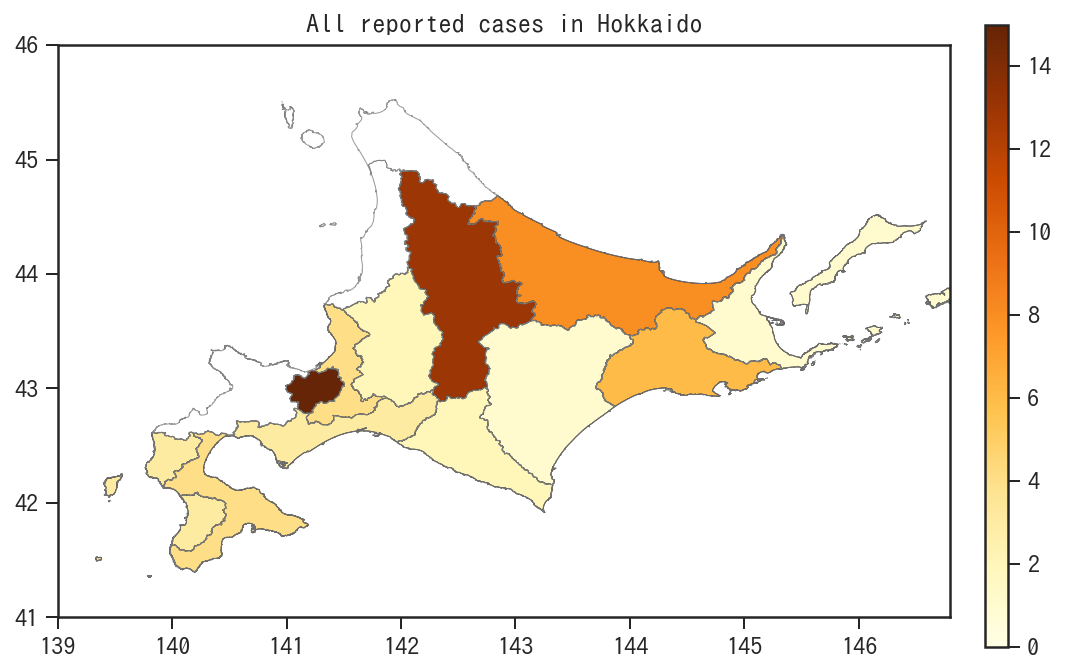

In [26]:
fig, ax = plt.subplots(figsize=(8, 12))

vmax = np.max(gdf_cases['n'].dropna().values)

pllt = 'YlOrBr'
gdf_cases.loc[lambda d: d['n']>0].plot(column='n', ax=ax, edgecolor='k', lw=.5, cmap = pllt, 
         categorical=False, legend=False, vmin=0, vmax=vmax,figsize=(10,12))
gdf.boundary.plot(ax=ax, edgecolor='grey', facecolor='none', lw=.5, alpha=.8)
ax.set_title('All reported cases in Hokkaido');

cax = fig.add_axes([.93, 0.32, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=pllt, norm=plt.Normalize(vmin=0, vmax=vmax)); sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
ax.set_xlim(139,146.8)
ax.set_ylim(41,46);

## <font color="green">Loading the dataset collected by us</font>

In [27]:
df_Sungmok = pd.read_excel("../../data/snapshot_hokkaido.xlsx",'onset_Hokkaido').rename(columns={'ID':'A_ID'}).drop('Remarks',axis=1)
df_Sungmok[:5]

,A_ID,Prefecture,Location,lat,long,Link,Onset,DateReportedConfirmed
0,A-070,Hokkaido,Furano,43.346464,142.381574,unknown,2020-02-15,2020-02-21
1,A-072,Hokkaido,Chitose,42.821344,141.650850,unknown,2020-02-16,2020-02-21
2,A-087,Hokkaido,Tomakomai,42.632567,141.602299,unknown,2020-02-06,2020-02-22
3,A-088,Hokkaido,Hakodate,41.768522,140.724700,unknown,2020-02-03,2020-02-22
4,A-089,Hokkaido,Asahikawa,43.770684,142.364555,direct,2020-02-16,2020-02-22


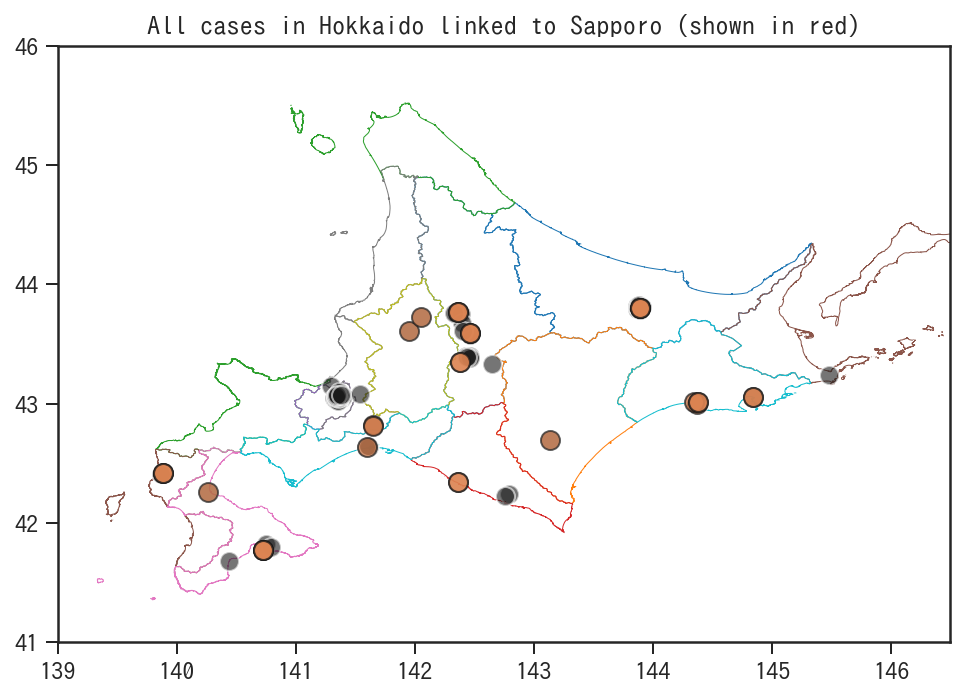

In [28]:
fig, ax = plt.subplots(figsize=(8, 10))
gdf.plot(column='subprefecture', ax=ax, edgecolor='grey', facecolor='none', lw=.5)
ax.scatter(df_cases['long'],df_cases['lat'], alpha=.6, edgecolor='w', facecolor='k', s=90)
ax.scatter(df_Sungmok['long'],df_Sungmok['lat'], alpha=.7, 
           edgecolor='k', facecolor='C1', s=90, marker='o')
ax.set_title('All cases in Hokkaido linked to Sapporo (shown in red)');
ax.set_xlim(139,146.5)
ax.set_ylim(41,46);

In [29]:
gdf_cases = gpd.GeoDataFrame(df_Sungmok, 
                             geometry=gpd.points_from_xy(df_Sungmok.long, 
                                                         df_Sungmok.lat))
gdf_cases

,A_ID,Prefecture,Location,lat,long,Link,Onset,DateReportedConfirmed,geometry
0,A-070,Hokkaido,Furano,43.346464,142.381574,unknown,2020-02-15,2020-02-21,POINT (142.38157 43.34646)
1,A-072,Hokkaido,Chitose,42.821344,141.650850,unknown,2020-02-16,2020-02-21,POINT (141.65085 42.82134)
2,A-087,Hokkaido,Tomakomai,42.632567,141.602299,unknown,2020-02-06,2020-02-22,POINT (141.60230 42.63257)
3,A-088,Hokkaido,Hakodate,41.768522,140.724700,unknown,2020-02-03,2020-02-22,POINT (140.72470 41.76852)
4,A-089,Hokkaido,Asahikawa,43.770684,142.364555,direct,2020-02-16,2020-02-22,POINT (142.36455 43.77068)
5,A-091,Hokkaido,Hakodate,41.768522,140.724700,unknown,2020-02-10,2020-02-22,POINT (140.72470 41.76852)
6,A-107,Hokkaido,Asahikawa,43.770684,142.364555,direct,2020-02-18,2020-02-24,POINT (142.36455 43.77068)
7,A-109,Hokkaido,Biei,43.589714,142.462540,unknown,2020-02-18,2020-02-23,POINT (142.46254 43.58971)
8,A-111,Hokkaido,Kushiro,42.992632,144.374357,unknown,2020-02-18,2020-02-23,POINT (144.37436 42.99263)
9,A-142,Hokkaido,Kushiro,43.010442,144.345245,unknown,2020-02-23,2020-02-26,POINT (144.34525 43.01044)


In [30]:
gdf_cases.crs = gdf.crs
dfsjoin = gpd.sjoin(gdf,gdf_cases)

dfsjoin[:5]

,subprefecture,geometry,population,index_right,A_ID,Prefecture,Location,lat,long,Link,Onset,DateReportedConfirmed
0,オホーツク総合振興局,"MULTIPOLYGON (((144.29495 44.00826, 144.29501 ...",281630,13,A-165,Hokkaido,Kitami,43.803952,143.893578,direct,2020-02-16,2020-02-27
0,オホーツク総合振興局,"MULTIPOLYGON (((144.29495 44.00826, 144.29501 ...",281630,18,A-171,Hokkaido,Kitami,43.803952,143.893578,unknown,2020-02-24,2020-02-27
0,オホーツク総合振興局,"MULTIPOLYGON (((144.29495 44.00826, 144.29501 ...",281630,30,A-189,Hokkaido,Kitami,43.803952,143.893578,unknown,2020-02-18,2020-02-28
0,オホーツク総合振興局,"MULTIPOLYGON (((144.29495 44.00826, 144.29501 ...",281630,31,A-190,Hokkaido,Kitami,43.803952,143.893578,unknown,2020-02-19,2020-02-28
1,上川総合振興局,"POLYGON ((142.72777 43.00980, 142.72769 43.009...",495947,17,A-170,Hokkaido,Asahikawa,43.770684,142.364555,unknown,2020-02-21,2020-02-27


In [31]:
gdf_cases = gdf.merge(dfsjoin.groupby('subprefecture')['A_ID'].agg(len).reset_index().rename(columns={'A_ID':'n'}),how='left')
gdf_cases.loc[lambda d: ~(d.n>0)]

,subprefecture,geometry,population,n
3,宗谷総合振興局,"MULTIPOLYGON (((142.84302 44.68841, 142.84306 ...",63844,NaN
4,後志総合振興局,"MULTIPOLYGON (((139.86560 42.66120, 139.86559 ...",209584,NaN
6,札幌市,"POLYGON ((141.09830 43.11764, 141.09985 43.116...",1955457,NaN
7,根室振興局,"MULTIPOLYGON (((145.49614 43.15839, 145.49606 ...",75055,NaN
10,留萌振興局,"MULTIPOLYGON (((141.32841 43.74073, 141.32840 ...",45840,NaN


## <font color="orange"> First figure</font>

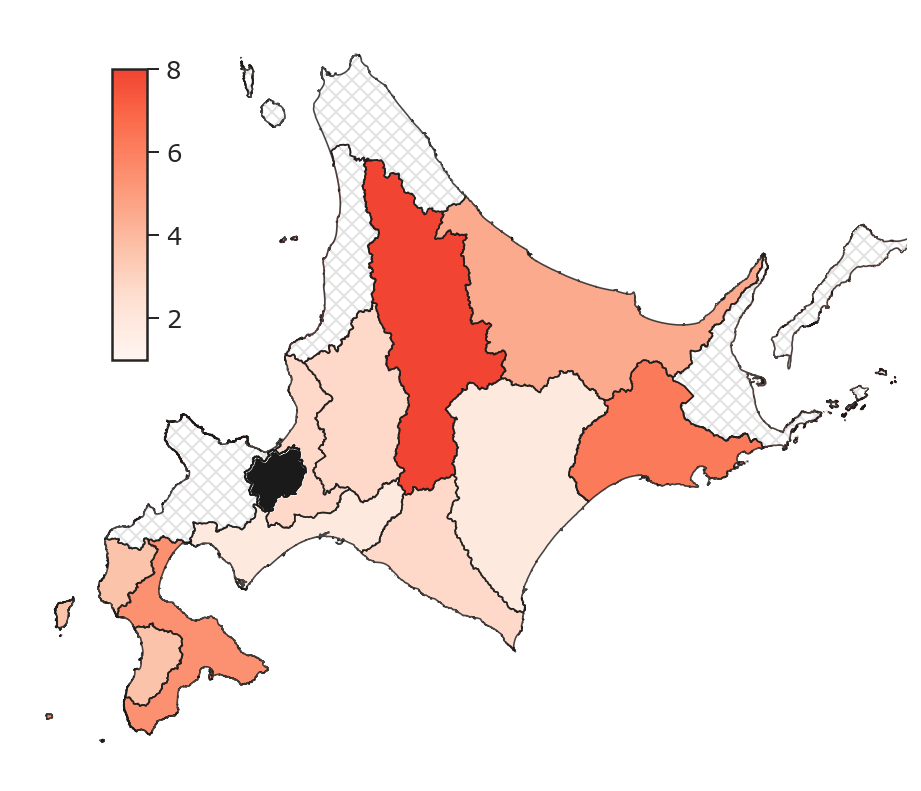

In [32]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 9))
import matplotlib.colors as colors

vmax = np.max(gdf_cases['n'].dropna().values)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
cmap = plt.get_cmap('Reds')
pllt = truncate_colormap(cmap, 0.0, 0.6)

gdf_cases = gdf_cases.to_crs(epsg=3857)
gdf_cases.loc[lambda d: ((d['n']>0)&(d.subprefecture!='札幌市'))].plot(column='n', axes=ax, edgecolor='none', lw=0, cmap = pllt, 
         categorical=False, legend=False, vmin=0, vmax=vmax)
gdf_cases.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, alpha=.8)
gdf_cases.loc[lambda d: (d.subprefecture=='札幌市')].plot(ax=ax, facecolor='k')
gdf_cases.loc[lambda d: (d.subprefecture=='札幌市')].boundary.plot(ax=ax, edgecolor='k', lw=.8)
gdf_cases.loc[lambda d: ((~(d['n']>0))&(d.subprefecture!='札幌市'))].plot(ax=ax, edgecolor='C7', hatch="xxx", alpha=.25, facecolor='none',
                cmap = pllt, categorical=False, legend=False, vmin=1, vmax=vmax)
ax.axis('off')

cax = fig.add_axes([.21, 0.53, 0.03, 0.224])
sm = plt.cm.ScalarMappable(cmap=pllt, norm=plt.Normalize(vmin=1, vmax=vmax)); sm._A = []
cbr = fig.colorbar(sm, cax=cax,)

ax.set_xlim(ax.get_xlim()[0]+.02*(ax.get_xlim()[1]-ax.get_xlim()[0]),
            ax.get_xlim()[0]+.73*(ax.get_xlim()[1]-ax.get_xlim()[0]))

plt.savefig("../../results/Andrei/Hokkaido1A.tiff",
            format='tiff', dpi=300, bbox_inches='tight');

## <font color="green">Creating the map of SouthEast Asia</font>

Some inspiration came from https://observablehq.com/@josephricafort/wuhan-coronavirus-jan-26-2020-12pm

In [33]:
gdf_sea = gpd.read_file('https://gist.githubusercontent.com/xaquingv/ed9b8fee8334186f25f7644aa7bb969e/raw/64241275882862032c11d24525f2811d8206e489/map.json')

In [34]:
gdf_sea['COUNTRY'].unique()

array(['China', 'Indonesia', 'Malaysia', 'India', 'Pakistan',
       'South Korea', 'North Korea', 'Bhutan', 'Mongolia', 'Vietnam',
       'Cambodia', 'Laos', 'Thailand', 'East Timor', 'Brunei', 'Myanmar',
       'Bangladesh', 'Afghanistan', 'Nepal', 'Hong Kong S.A.R.',
       'Siachen Glacier', 'New Caledonia', 'Philippines', 'Sri Lanka',
       'Taiwan', 'Japan', 'Marshall Islands', 'Indian Ocean Territories',
       'Singapore', 'Norfolk Island', 'Solomon Islands', 'Tuvalu',
       'Maldives', 'Nauru', 'Federated States of Micronesia', 'Vanuatu',
       'Palau', 'Guam', 'Northern Mariana Islands', 'Coral Sea Islands',
       'Spratly Islands', 'Macao S.A.R', 'Ashmore and Cartier Islands',
       'Scarborough Reef'], dtype=object)

In [35]:
gdf_sea = gdf_sea.dissolve(by='COUNTRY', aggfunc='sum').reset_index()

In [36]:
gdf_sea = gdf_sea.loc[lambda d: [x not in ['Sri Lanka','Pakistan','Afghanistan'] for x in d.COUNTRY]]

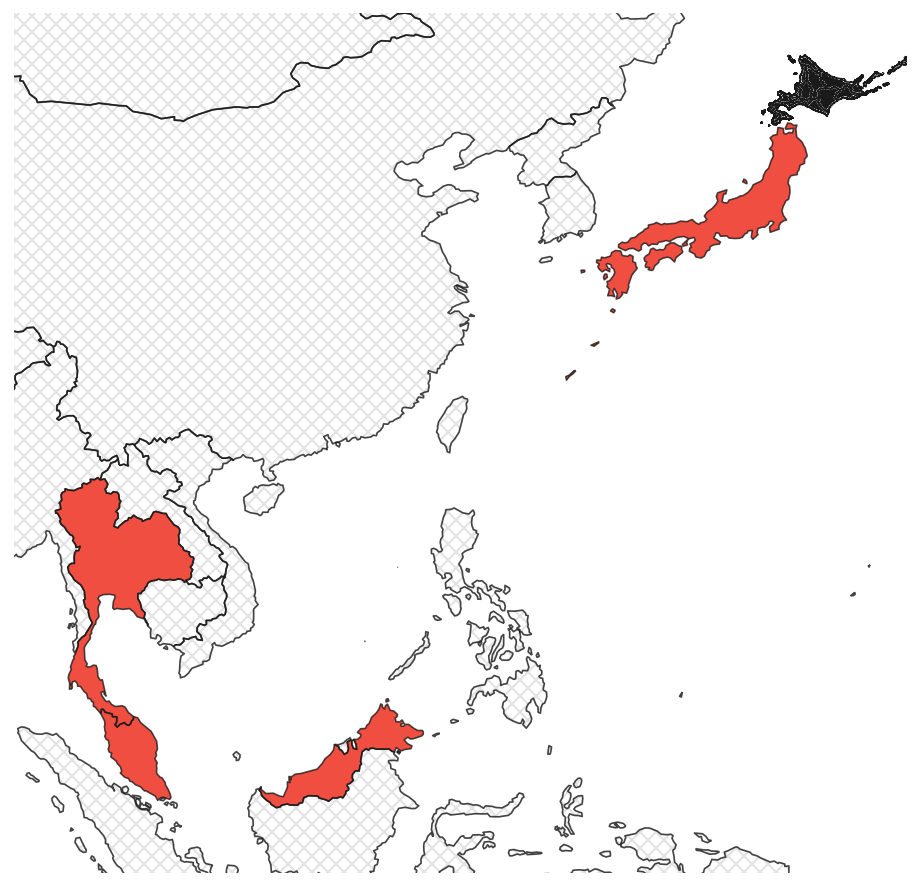

In [37]:
fig, ax = plt.subplots(figsize=(8, 9))

gdf_sea.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, alpha=.8)

gdf.plot(ax=ax, facecolor='k',zorder=5)
gdf.boundary.plot(ax=ax, edgecolor='k', lw=.8, zorder=5)

gdf_sea.loc[lambda d: [x not in ['Malaysia','Thailand','Japan'] for x in d.COUNTRY]].plot(ax=ax, edgecolor='C7', hatch="xxx", alpha=.25, facecolor='none')
gdf_sea.loc[lambda d: [x in ['Malaysia','Thailand','Japan'] for x in d.COUNTRY]].plot(ax=ax, edgecolor='none', lw=0, alpha=.9, facecolor='#ef3b2c')

ax.axis('off')

ax.set_xlim(left=95,right=148)
ax.set_ylim(bottom=-3,top=48)

plt.savefig("../../results/Andrei/Hokkaido1C.tiff",
            format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../results/Andrei/Hokkaido1C.pdf",
            format='pdf',bbox_inches='tight');

(Arrows *etc.* will be put later)

## <font color="green">Predicting commuters flow by using *movement* package</font>

In [38]:
gdf = gdf_cases.copy()

In [39]:
# getting coordinates of centroids
gdf["x"] = gdf.centroid.map(lambda p: p.x)
gdf["y"] = gdf.centroid.map(lambda p: p.y)
gdf["centroid"] = gdf.centroid
gdf[:2]

,subprefecture,geometry,population,n,x,y,centroid
0,オホーツク総合振興局,"MULTIPOLYGON (((16062839.987 5466720.904, 1606...",281630,4.0,1.599428e+07,5.461394e+06,POINT (15994278.636 5461393.641)
1,上川総合振興局,"POLYGON ((15888382.895 5313464.133, 15888373.4...",495947,8.0,1.586265e+07,5.452546e+06,POINT (15862653.322 5452546.453)


In [40]:
# creating a data frame to use later in movement package
df_locations = pd.DataFrame({'location': gdf.subprefecture, 'population': gdf.population, 'x': gdf.x, 'y': gdf.y})
df_locations = df_locations.loc[lambda d: d.population>0]
df_locations.population = df_locations.population.astype('int64')
df_locations[:5]

,location,population,x,y
0,オホーツク総合振興局,281630,1.599428e+07,5.461394e+06
1,上川総合振興局,495947,1.586265e+07,5.452546e+06
2,十勝総合振興局,340088,1.594909e+07,5.314508e+06
3,宗谷総合振興局,63844,1.581728e+07,5.631005e+06
4,後志総合振興局,209584,1.565324e+07,5.300196e+06


In [41]:
df_locations = df_locations.loc[lambda d: [x in gdf.subprefecture.values for x in d.location]].reset_index(drop=True)
s = gpd.GeoSeries([Point(x,y) for x, y in zip(df_locations['x'], df_locations['y'])])
gdf_locations = gpd.GeoDataFrame(df_locations[['location', 'population']], geometry=s)
gdf_locations

,location,population,geometry
0,オホーツク総合振興局,281630,POINT (15994278.636 5461393.641)
1,上川総合振興局,495947,POINT (15862653.322 5452546.453)
2,十勝総合振興局,340088,POINT (15949093.014 5314508.124)
3,宗谷総合振興局,63844,POINT (15817277.803 5631005.234)
4,後志総合振興局,209584,POINT (15653236.998 5300196.376)
5,日高振興局,66894,POINT (15878150.114 5234282.037)
6,札幌市,1955457,POINT (15723838.277 5311198.455)
7,根室振興局,75055,POINT (16291727.717 5505207.395)
8,檜山振興局,36168,POINT (15593826.572 5179595.087)
9,渡島総合振興局,395365,POINT (15635790.766 5154852.357)


In [42]:
gdf_locations['x'] = gdf_locations.geometry.map(lambda p: p.x)
gdf_locations['y'] = gdf_locations.geometry.map(lambda p: p.y)
gdf_locations.drop('geometry',1,inplace=True) 
gdf_locations

,location,population,x,y
0,オホーツク総合振興局,281630,1.599428e+07,5.461394e+06
1,上川総合振興局,495947,1.586265e+07,5.452546e+06
2,十勝総合振興局,340088,1.594909e+07,5.314508e+06
3,宗谷総合振興局,63844,1.581728e+07,5.631005e+06
4,後志総合振興局,209584,1.565324e+07,5.300196e+06
5,日高振興局,66894,1.587815e+07,5.234282e+06
6,札幌市,1955457,1.572384e+07,5.311198e+06
7,根室振興局,75055,1.629173e+07,5.505207e+06
8,檜山振興局,36168,1.559383e+07,5.179595e+06
9,渡島総合振興局,395365,1.563579e+07,5.154852e+06


In [43]:
gdf_locations = gdf_locations.sort_values('y',ascending=False).reset_index(drop=True)
gdf_locations

,location,population,x,y
0,宗谷総合振興局,63844,1.581728e+07,5.631005e+06
1,留萌振興局,45840,1.578784e+07,5.511017e+06
2,根室振興局,75055,1.629173e+07,5.505207e+06
3,オホーツク総合振興局,281630,1.599428e+07,5.461394e+06
4,上川総合振興局,495947,1.586265e+07,5.452546e+06
5,空知総合振興局,293770,1.580246e+07,5.373394e+06
6,釧路総合振興局,230748,1.607362e+07,5.346856e+06
7,石狩振興局,422033,1.575168e+07,5.335613e+06
8,十勝総合振興局,340088,1.594909e+07,5.314508e+06
9,札幌市,1955457,1.572384e+07,5.311198e+06


In [44]:
baseline_fraction = .01

In [45]:
%%R -o predicted_flux -i gdf_locations -i baseline_fraction
library(movement)
# predicted_flux  <- predict(originalRadiation(theta = 0.33), gdf_locations, symmetric = TRUE)
predicted_flux  <- predict(uniformSelection(theta = baseline_fraction), gdf_locations, symmetric = T)

Started processing at 2020-04-12 19:12:35 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:12:36 
Time taken: 0 seconds



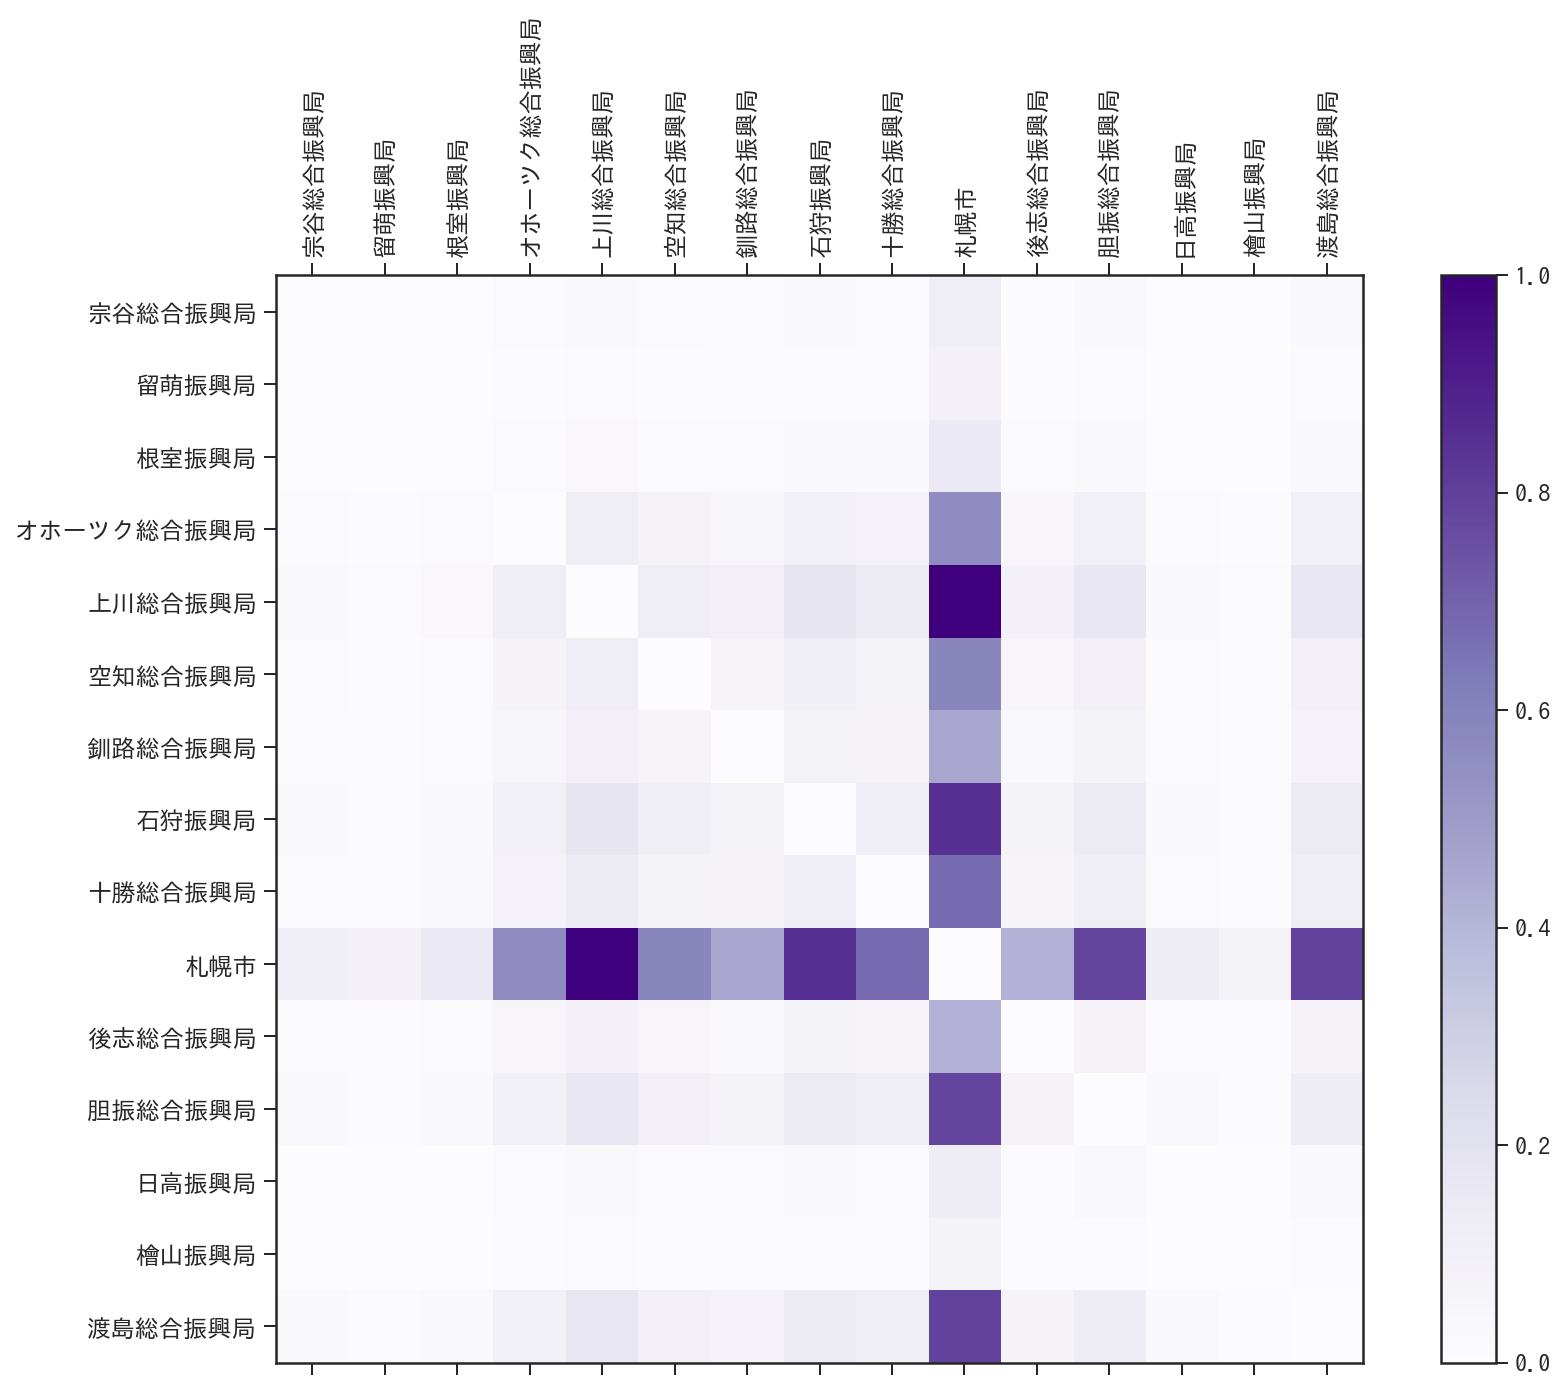

In [46]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

plt.rcParams["font.family"]="IPAGothic"

with localconverter(ro.default_converter + pandas2ri.converter):
    pd_from_r_df = ro.conversion.rpy2py(predicted_flux)
    gdf_locations_ = ro.conversion.rpy2py(pd_from_r_df[0]).set_index('location')
    mvm_matrix = np.matrix(np.reshape(ro.conversion.rpy2py(pd_from_r_df[1]),(len(gdf_locations_),len(gdf_locations_))))

df_mvm = pd.DataFrame(mvm_matrix,
                      index=gdf_locations_.index.astype('str'),
                      columns=gdf_locations_.index.astype('str'))
# re-ordering
gdf_locations_ = gdf_locations_.loc[gdf_locations.location]
df_mvm = df_mvm.loc[gdf_locations.location,gdf_locations.location]

gdf_locations.to_excel('gdf_locations.xlsx',encoding='utf-8', index=False)
df_mvm.to_excel('df_mvm.xlsx',encoding='utf-8',index=True)

palette_name = 'Purples'

fig, ax = plt.subplots(figsize=(14, 10))

cax = ax.matshow(df_mvm, cmap=palette_name)
ax.set_xticks(range(len(gdf_locations_))); ax.set_yticks(range(len(gdf_locations_))); 
ax.set_xticklabels(gdf_locations_.index);
ax.set_yticklabels(gdf_locations_.index);
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90);

cax = fig.add_axes()
sm = plt.cm.ScalarMappable(cmap=palette_name); sm._A = []
fig.colorbar(sm, cax=cax,);

In [47]:
df札幌市_mvm = df_mvm.loc[lambda d: d.index=='札幌市'].melt()
df札幌市_mvm

,location,value
0,宗谷総合振興局,611.011835
1,留萌振興局,438.120954
2,根室振興局,718.905858
3,オホーツク総合振興局,2740.873604
4,上川総合振興局,4912.702628
5,空知総合振興局,2861.793258
6,釧路総合振興局,2236.671709
7,石狩振興局,4154.550015
8,十勝総合振興局,3325.388508
9,札幌市,0.000000


In [48]:
df_cases_mvm = gdf_cases.loc[lambda d: ((d.subprefecture!='札幌市')),['subprefecture','n','population']]\
    .merge(df札幌市_mvm.rename(columns={'location':'subprefecture'}),how='left')\
    .fillna(0)
df_cases_mvm.sort_values('value',ascending=False)

,subprefecture,n,population,value
1,上川総合振興局,8.0,495947,4912.702628
10,石狩振興局,2.0,422033,4154.550015
8,渡島総合振興局,5.0,395365,3883.424440
12,胆振総合振興局,1.0,391990,3849.201151
2,十勝総合振興局,1.0,340088,3325.388508
11,空知総合振興局,2.0,293770,2861.793258
0,オホーツク総合振興局,4.0,281630,2740.873604
13,釧路総合振興局,6.0,230748,2236.671709
4,後志総合振興局,0.0,209584,2028.170716
6,根室振興局,0.0,75055,718.905858


(0.0, 10.0)

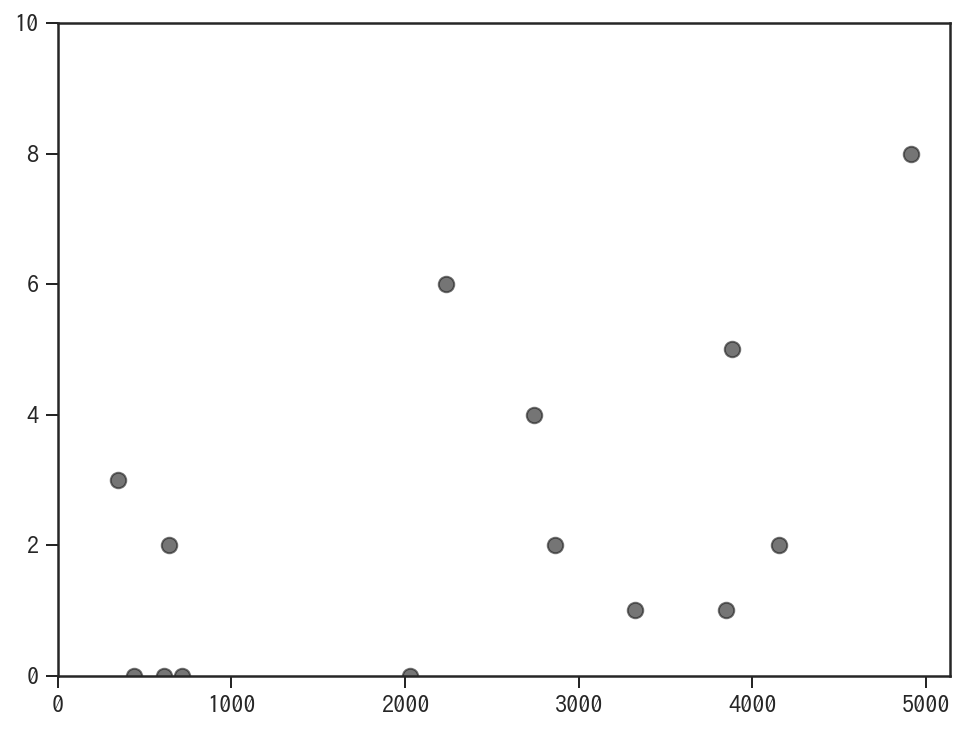

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_cases_mvm['value'],df_cases_mvm['n'],color='k',s=60,alpha=.6)
# ax.scatter(df_['value'],df_['n'],color='C1',s=60,marker='o')
ax.set_xlim(left=0)
ax.set_ylim(0,10)

In [50]:
df_cases_mvm['n'].values

array([4., 8., 1., 0., 0., 2., 0., 3., 5., 0., 2., 2., 1., 6.])

In [51]:
札幌市pop = df_pop.loc[lambda d: d['Unit']=='札幌市','Population'].values[0]
with pm.Model() as model:
    lnβ = pm.Normal('lnβ', -10, 25, testval=-10.)
#     pm.Poisson('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, 
#                observed=df_cases_mvm['n'].values+1e-6)
    k = pm.HalfNormal('k', 10)
    pm.NegativeBinomial('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, k, 
               observed=df_cases_mvm['n'].values+1e-4)
        
    trace = pm.sample(2500, tune=10000, init='advi', cores=8, target_accept=.96)
    
# az.plot_trace(trace)
trace_summary = pm.summary(trace, credible_interval=.95)
trace_summary

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.348:   6%|▌         | 11779/200000 [00:03<00:59, 3172.53it/s]
Convergence achieved at 11800
Interrupted at 11,799 [5%]: Average Loss = 54.299
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4001.82draws/s]


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
lnβ,-6.811,0.263,-7.326,-6.291,0.003,0.002,9848.0,9848.0,10724.0,8021.0,1.0
k,5.835,4.972,0.288,16.148,0.058,0.041,7394.0,7394.0,6988.0,9789.0,1.0


In [52]:
with model:
#     札幌市cases = pm.Poisson('札幌市cases', tt.exp(lnβ)*札幌市pop)
    札幌市cases = pm.NegativeBinomial('札幌市cases', tt.exp(lnβ)*札幌市pop, k)
    smpl = pm.sample_posterior_predictive(trace, 10000, var_names=['札幌市cases'])

/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1567.31it/s]


In [53]:
pm.summary(smpl, credible_interval=.95)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,2237.4,1649.542,0.0,4912.0,17.502,12.376,8883.0,8883.0,9120.0,8446.0,NaN


(0.0, 10.0)

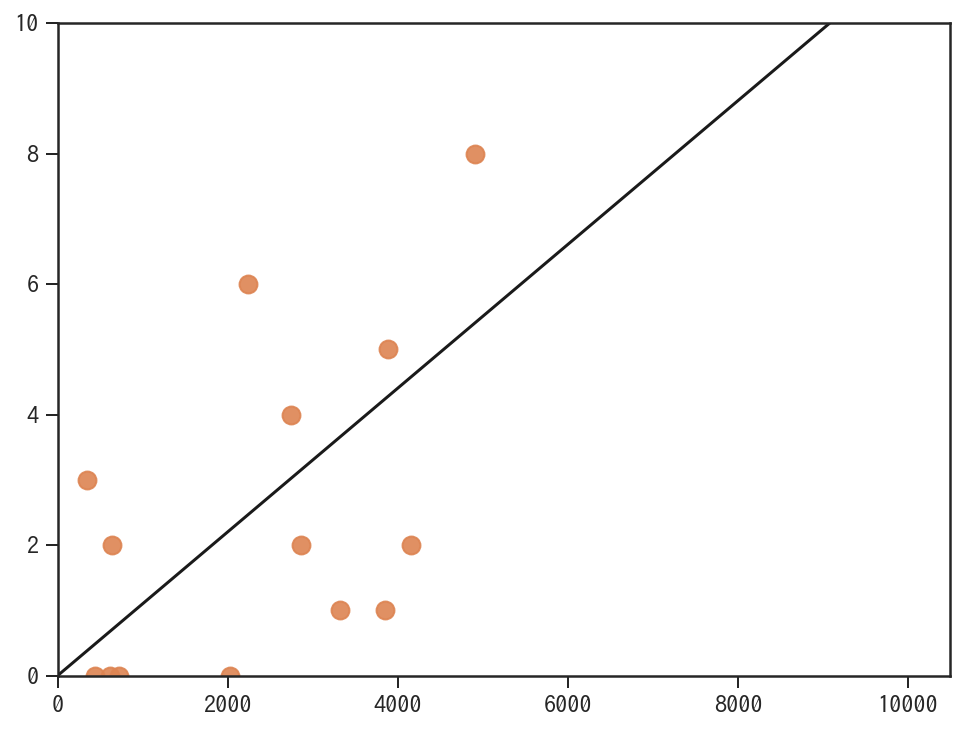

In [54]:
# for lnβ in trace['lnβ'][:5]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_cases_mvm['value'],df_cases_mvm['n'],color='C1',s=80,alpha=.9)
# ax.scatter(df_['value'],df_['n'],color='C1',s=60,marker='o')

xmax = (np.max(df_cases_mvm['value'])//10000+1)*10000
step = xmax/100
xx = np.arange(0,xmax+step,step)
yy = [np.exp(trace_summary.loc['lnβ','mean'])*x for x in xx]
ax.plot(xx,yy,color='k',lw=1.5)

ax.set_xlim(left=0)
ax.set_ylim(0,10)

In [55]:
step = 0.0025
for idx,commuter_fraction in enumerate(np.arange(step,0.06+step,step)):
    print(colored(commuter_fraction,'red'))
    predicted_flux = %R -i commuter_fraction -i gdf_locations library(movement); predict(uniformSelection(theta = commuter_fraction), gdf_locations, symmetric = T)

    with localconverter(ro.default_converter + pandas2ri.converter):
        pd_from_r_df = ro.conversion.rpy2py(predicted_flux)
        gdf_locations_ = ro.conversion.rpy2py(pd_from_r_df[0]).set_index('location')
        mvm_matrix = np.matrix(np.reshape(ro.conversion.rpy2py(pd_from_r_df[1]),(len(gdf_locations_),len(gdf_locations_))))

    df_mvm = pd.DataFrame(mvm_matrix,
                          index=gdf_locations_.index.astype('str'),
                          columns=gdf_locations_.index.astype('str'))
    df札幌市_mvm = df_mvm.loc[lambda d: d.index=='札幌市'].melt()

    df_cases_mvm = gdf_cases.loc[lambda d: ((d.subprefecture!='札幌市')),['subprefecture','n','population']]\
        .merge(df札幌市_mvm.rename(columns={'location':'subprefecture'}),how='left')\
        .fillna(0)
    札幌市pop = df_pop.loc[lambda d: d['Unit']=='札幌市','Population'].values[0]

    with pm.Model() as model:
        lnβ = pm.Normal('lnβ', -10, 25, testval=-10.)

## in case if to use Poisson instead of Negative Binomial
#         pm.Poisson('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, 
#                    observed=df_cases_mvm['n'].values)
        k = pm.HalfNormal('k', 10)
        pm.NegativeBinomial('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, k, 
                   observed=df_cases_mvm['n'].values+1e-4)

        trace = pm.sample(2500, tune=10000, init='advi', cores=8, target_accept=.96)

    with model:
#         札幌市cases = pm.Poisson('札幌市cases', tt.exp(lnβ)*札幌市pop)
        札幌市cases = pm.NegativeBinomial('札幌市cases', tt.exp(lnβ)*札幌市pop, k)
        smpl = pm.sample_posterior_predictive(trace, 10000, var_names=['札幌市cases'])

    smpl_summary = pm.summary(smpl, credible_interval=.95)
    display(smpl_summary)
    res_ = np.r_[[commuter_fraction],smpl_summary.loc['札幌市cases', ['mean','hpd_2.5%','hpd_97.5%']].values].tolist()
    res = [res_] if idx==0 else np.r_[res, [res_]]
    
df_res = pd.DataFrame(res, columns=['fraction','mean','q2.5','q97.5'])
df_res

0.0025
Started processing at 2020-04-12 19:14:42 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:14:42 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 49.438:   5%|▍         | 9591/200000 [00:03<00:59, 3196.84it/s]
Convergence achieved at 9800
Interrupted at 9,799 [4%]: Average Loss = 88.981
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:31<00:00, 3224.53draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1518.22it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,8774.948,6350.524,1.0,18966.0,64.852,47.427,9589.0,8965.0,9737.0,8208.0,NaN


0.005
Started processing at 2020-04-12 19:15:29 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:15:29 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.027:   8%|▊         | 15861/200000 [00:05<00:58, 3152.23it/s]
Convergence achieved at 16000
Interrupted at 15,999 [7%]: Average Loss = 58.257
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:26<00:00, 3789.63draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1536.53it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,4440.018,3098.833,0.0,9687.0,34.239,24.815,8191.0,7798.0,8325.0,8415.0,NaN


0.0075
Started processing at 2020-04-12 19:16:14 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:16:14 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.016:   7%|▋         | 14230/200000 [00:04<00:59, 3127.35it/s]
Convergence achieved at 14500
Interrupted at 14,499 [7%]: Average Loss = 54.403
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:25<00:00, 3869.12draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1517.54it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,2992.079,2241.672,0.0,6584.0,26.905,21.151,6942.0,5617.0,8336.0,8068.0,NaN


0.01
Started processing at 2020-04-12 19:16:58 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:16:58 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.17:   6%|▌         | 12272/200000 [00:03<00:55, 3355.91it/s] 
Convergence achieved at 12300
Interrupted at 12,299 [6%]: Average Loss = 53.448
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4274.74draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1521.28it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,2232.931,1661.265,0.0,4893.0,18.581,13.356,7993.0,7736.0,9158.0,8193.0,NaN


0.0125
Started processing at 2020-04-12 19:17:38 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:17:38 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.18:   6%|▌         | 11751/200000 [00:03<00:57, 3278.54it/s] 
Convergence achieved at 11900
Interrupted at 11,899 [5%]: Average Loss = 50.786
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:25<00:00, 3878.69draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1557.26it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,1797.538,1451.672,0.0,3952.0,17.025,12.039,7270.0,7270.0,8499.0,7870.0,NaN


0.015000000000000001
Started processing at 2020-04-12 19:18:21 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:18:21 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 39.562:   3%|▎         | 6661/200000 [00:02<01:00, 3182.85it/s]
Convergence achieved at 6900
Interrupted at 6,899 [3%]: Average Loss = 58.042
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4109.54draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1538.52it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,1466.833,1040.647,0.0,3244.0,10.386,7.58,10039.0,9424.0,9760.0,7756.0,NaN


0.017499999999999998
Started processing at 2020-04-12 19:19:01 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:19:01 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.745:   5%|▍         | 9140/200000 [00:02<00:53, 3570.45it/s]
Convergence achieved at 9200
Interrupted at 9,199 [4%]: Average Loss = 50.097
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4074.69draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1558.34it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,1269.372,932.5,0.0,2741.0,10.098,7.164,8527.0,8472.0,8750.0,7837.0,NaN


0.02
Started processing at 2020-04-12 19:19:41 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:19:41 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.298:   5%|▍         | 9388/200000 [00:02<00:57, 3321.18it/s]
Convergence achieved at 9700
Interrupted at 9,699 [4%]: Average Loss = 47.465
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4017.83draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1524.67it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,1102.876,799.508,0.0,2428.0,8.703,6.154,8438.0,8438.0,8676.0,8043.0,NaN


0.0225
Started processing at 2020-04-12 19:20:22 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:20:22 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.191:   5%|▍         | 9439/200000 [00:02<00:55, 3419.96it/s]
Convergence achieved at 9600
Interrupted at 9,599 [4%]: Average Loss = 45.955
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:27<00:00, 3618.64draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1534.28it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,980.013,766.274,0.0,2078.0,8.133,5.751,8878.0,8878.0,8771.0,7753.0,NaN


0.024999999999999998
Started processing at 2020-04-12 19:21:06 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:21:06 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.498:   4%|▍         | 7971/200000 [00:02<00:57, 3350.56it/s]
Convergence achieved at 8200
Interrupted at 8,199 [4%]: Average Loss = 46.499
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:26<00:00, 3795.76draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1559.96it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,898.904,674.727,0.0,1988.0,7.454,5.271,8195.0,8195.0,8928.0,8261.0,NaN


0.0275
Started processing at 2020-04-12 19:21:48 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:21:48 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.031:   4%|▍         | 8749/200000 [00:02<00:53, 3557.85it/s]
Convergence achieved at 8800
Interrupted at 8,799 [4%]: Average Loss = 44.53
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:26<00:00, 3756.76draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1547.17it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,819.163,662.809,0.0,1789.0,7.156,5.06,8579.0,8579.0,9139.0,7572.0,NaN


0.03
Started processing at 2020-04-12 19:22:31 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:22:31 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.333:   4%|▍         | 7709/200000 [00:02<00:57, 3323.11it/s]
Convergence achieved at 8000
Interrupted at 7,999 [3%]: Average Loss = 44.404
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:27<00:00, 3674.42draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1536.72it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,760.775,761.389,0.0,1641.0,8.183,5.786,8658.0,8658.0,8970.0,7534.0,NaN


0.0325
Started processing at 2020-04-12 19:23:14 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:23:14 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.147:   4%|▍         | 7563/200000 [00:02<00:58, 3263.98it/s]
Convergence achieved at 7900
Interrupted at 7,899 [3%]: Average Loss = 43.717
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:25<00:00, 3892.24draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1506.03it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,684.122,511.757,0.0,1539.0,5.382,3.981,9040.0,8262.0,9514.0,8134.0,NaN


0.035
Started processing at 2020-04-12 19:23:56 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:23:56 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.32:   4%|▎         | 7437/200000 [00:02<00:59, 3252.58it/s] 
Convergence achieved at 7600
Interrupted at 7,599 [3%]: Average Loss = 43.266
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4031.58draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1575.06it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,629.388,455.455,0.0,1364.0,4.693,3.318,9420.0,9420.0,9224.0,8293.0,NaN


0.037500000000000006
Started processing at 2020-04-12 19:24:36 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:24:36 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.56:   3%|▎         | 6861/200000 [00:02<00:57, 3377.37it/s] 
Convergence achieved at 6900
Interrupted at 6,899 [3%]: Average Loss = 43.25
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:25<00:00, 3969.00draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1504.63it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,601.691,461.771,0.0,1334.0,4.966,3.511,8648.0,8648.0,9055.0,8472.0,NaN


0.04
Started processing at 2020-04-12 19:25:17 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:25:17 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.541:   3%|▎         | 6596/200000 [00:01<00:57, 3335.75it/s]
Convergence achieved at 6800
Interrupted at 6,799 [3%]: Average Loss = 42.644
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4103.32draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1471.92it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,562.668,442.052,0.0,1221.0,4.837,3.42,8353.0,8353.0,9283.0,8041.0,NaN


0.0425
Started processing at 2020-04-12 19:25:58 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:25:58 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.359:   3%|▎         | 6730/200000 [00:02<01:02, 3091.96it/s]
Convergence achieved at 6800
Interrupted at 6,799 [3%]: Average Loss = 41.909
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4207.21draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1512.68it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,524.634,518.322,0.0,1115.0,5.961,4.215,7561.0,7561.0,9001.0,7875.0,NaN


0.045000000000000005
Started processing at 2020-04-12 19:26:37 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:26:37 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.074:   4%|▎         | 7035/200000 [00:02<00:55, 3456.77it/s]
Convergence achieved at 7100
Interrupted at 7,099 [3%]: Average Loss = 40.953
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4194.00draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1497.13it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,494.757,360.452,0.0,1064.0,3.997,2.827,8131.0,8131.0,8818.0,7247.0,NaN


0.0475
Started processing at 2020-04-12 19:27:17 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:27:17 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.022:   4%|▎         | 7139/200000 [00:02<00:58, 3303.42it/s]
Convergence achieved at 7300
Interrupted at 7,299 [3%]: Average Loss = 40.436
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4302.43draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1536.46it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,473.46,352.045,0.0,1011.0,3.891,2.752,8184.0,8184.0,8575.0,8253.0,NaN


0.05
Started processing at 2020-04-12 19:27:56 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:27:56 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.356:   3%|▎         | 6327/200000 [00:01<00:51, 3748.17it/s]
Convergence achieved at 6500
Interrupted at 6,499 [3%]: Average Loss = 40.621
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:25<00:00, 3848.13draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1536.35it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,439.546,324.659,0.0,984.0,3.699,2.676,7702.0,7359.0,8580.0,7932.0,NaN


0.052500000000000005
Started processing at 2020-04-12 19:28:37 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:28:38 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.3:   3%|▎         | 6065/200000 [00:01<01:00, 3228.45it/s]  
Convergence achieved at 6300
Interrupted at 6,299 [3%]: Average Loss = 40.404
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4251.08draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1511.08it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,422.188,297.693,0.0,917.0,3.073,2.173,9384.0,9384.0,9426.0,8258.0,NaN


0.055
Started processing at 2020-04-12 19:29:17 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:29:17 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.023:   3%|▎         | 6569/200000 [00:01<00:53, 3582.47it/s]
Convergence achieved at 6600
Interrupted at 6,599 [3%]: Average Loss = 39.628
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4176.43draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1524.06it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,402.137,289.672,0.0,874.0,3.045,2.153,9053.0,9053.0,9122.0,8825.0,NaN


0.0575
Started processing at 2020-04-12 19:29:56 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:29:57 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.418:   3%|▎         | 5766/200000 [00:01<01:00, 3236.68it/s]
Convergence achieved at 6000
Interrupted at 5,999 [2%]: Average Loss = 39.699
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4263.07draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1542.31it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,387.326,290.696,0.0,851.0,3.238,2.384,8058.0,7433.0,9154.0,7697.0,NaN


0.060000000000000005
Started processing at 2020-04-12 19:30:35 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:30:35 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.219:   3%|▎         | 5626/200000 [00:01<00:58, 3328.23it/s]
Convergence achieved at 5900
Interrupted at 5,899 [2%]: Average Loss = 39.518
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4172.05draws/s]
/home/aakhmetz/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 10000/10000 [00:06<00:00, 1445.13it/s]
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
札幌市cases,368.218,263.29,0.0,788.0,2.866,2.106,8439.0,7812.0,9297.0,7867.0,NaN


,fraction,mean,q2.5,q97.5
0,0.0025,8774.948,1.0,18966.0
1,0.0050,4440.018,0.0,9687.0
2,0.0075,2992.079,0.0,6584.0
3,0.0100,2232.931,0.0,4893.0
4,0.0125,1797.538,0.0,3952.0
5,0.0150,1466.833,0.0,3244.0
6,0.0175,1269.372,0.0,2741.0
7,0.0200,1102.876,0.0,2428.0
8,0.0225,980.013,0.0,2078.0
9,0.0250,898.904,0.0,1988.0


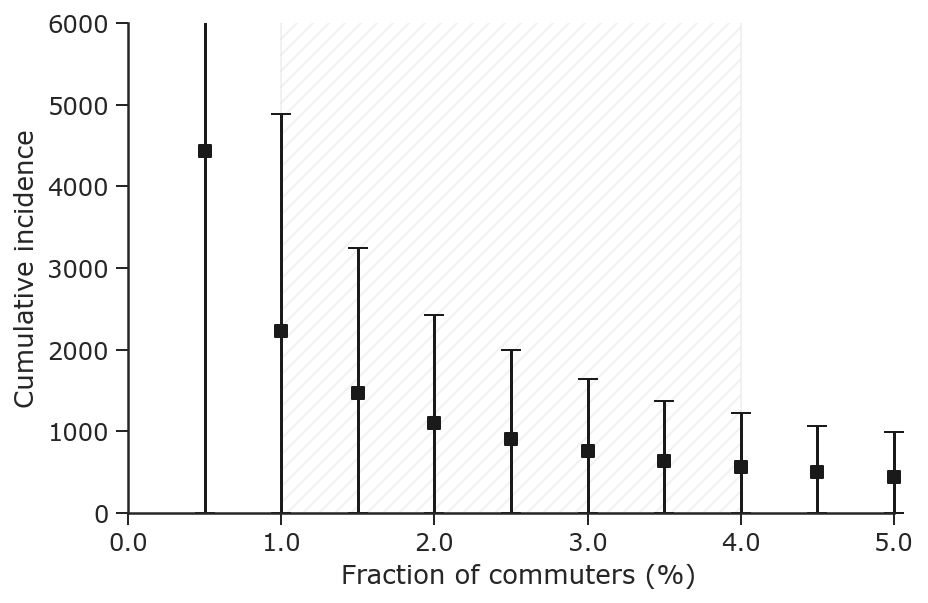

In [56]:
## English version
set_plot_style(False)

fig, ax = plt.subplots(figsize=(7, 4.5))
xmax = .05
ymax = 6000

df_res_ = df_res[1::2]

ax.scatter(df_res_['fraction'],df_res_['mean'], marker='s', color='k')
# ax.fill_between(df_res['fraction'],df_res['q2.5'],df_res['q97.5'], edgecolor='k', facecolor='C7', alpha=.4, zorder=-5)

ax.errorbar(df_res_['fraction'], (df_res_['q2.5'].values+df_res_['q97.5'].values)/2, yerr=(df_res_['q97.5'].values-df_res_['q2.5'].values)/2, 
            capsize = 5, marker='s', markersize=0, mfc='w', color='k', zorder=-2, ls='none')
ax.fill_between([.01,.04],[0]*2,[ymax*1.1]*2, edgecolor='lightgrey', hatch="///", facecolor='none', alpha=.3, zorder=-6)

ax.set_xlim(0,xmax+.001); ax.set_ylim(0,ymax)
xstep = 0.01; xtks = np.arange(0,xmax+xstep,xstep)
ystep = 1000; ytks = np.arange(0,ymax+ystep,ystep)
ax.set_xticks(xtks); ax.set_xticklabels([round(100*x,1) for x in xtks])
ax.set_yticks(ytks)
ax.set_xlabel("Fraction of commuters (%)", fontsize=13)
ax.set_ylabel("Cumulative incidence", fontsize=13)
ax.spines['left'].set_bounds(0,ymax)
ax.spines['bottom'].set_bounds(0,xmax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/Hokkaido1B.pdf", format='pdf', bbox_inches='tight');

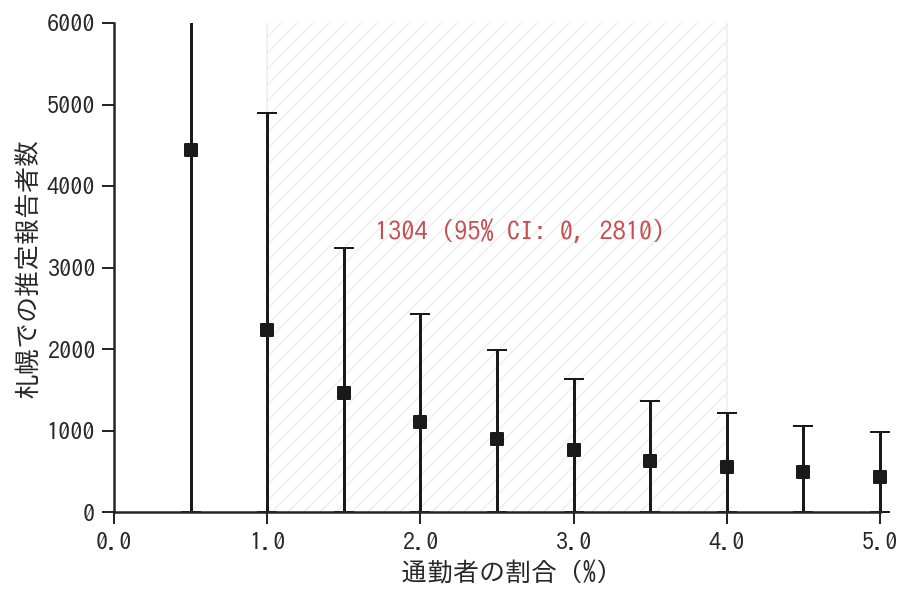

In [57]:
## Japanese version
#### Text can be different
set_plot_style(False)

plt.rcParams["font.family"]="IPAGothic"

fig, ax = plt.subplots(figsize=(7, 4.5))
xmax = .05
ymax = 6000

df_res_ = df_res[1::2]

ax.scatter(df_res_['fraction'],df_res_['mean'], marker='s', color='k')
# ax.fill_between(df_res['fraction'],df_res['q2.5'],df_res['q97.5'], edgecolor='k', facecolor='C7', alpha=.4, zorder=-5)

ax.errorbar(df_res_['fraction'], (df_res_['q2.5'].values+df_res_['q97.5'].values)/2, yerr=(df_res_['q97.5'].values-df_res_['q2.5'].values)/2, 
            capsize = 5, marker='s', markersize=0, mfc='w', color='k', zorder=-2, ls='none')
ax.fill_between([.01,.04],[0]*2,[ymax*1.1]*2, edgecolor='lightgrey', hatch="///", facecolor='none', alpha=.3, zorder=-6)

ax.annotate("1304 (95% CI: 0, 2810)",[0.017, 3350],ha='left',color='C3')

ax.set_xlim(0,xmax+.001); ax.set_ylim(0,ymax)
xstep = 0.01; xtks = np.arange(0,xmax+xstep,xstep)
ystep = 1000; ytks = np.arange(0,ymax+ystep,ystep)
ax.set_xticks(xtks); ax.set_xticklabels([round(100*x,1) for x in xtks])
ax.set_yticks(ytks)
ax.set_xlabel("通勤者の割合 (%)", fontsize=13)
ax.set_ylabel("札幌での推定報告者数", fontsize=13)
ax.spines['left'].set_bounds(0,ymax)
ax.spines['bottom'].set_bounds(0,xmax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/Hokkaido1B-jpn.pdf", format='pdf', bbox_inches='tight');

## <font color="orange">Comparing two mobility models</font>

In [58]:
commuter_fraction = 0.01
models = []; traces = []
for kernel in ['uniform','radiation']:
    print(colored(kernel,'red'))
    if kernel=='uniform':
        predicted_flux = %R -i commuter_fraction -i gdf_locations library(movement); predict(uniformSelection(theta = commuter_fraction), gdf_locations, symmetric = T)
    else:
        predicted_flux = %R -i commuter_fraction -i gdf_locations library(movement); predict(originalRadiation(theta = commuter_fraction), gdf_locations, symmetric = T)

    with localconverter(ro.default_converter + pandas2ri.converter):
        pd_from_r_df = ro.conversion.rpy2py(predicted_flux)
        gdf_locations_ = ro.conversion.rpy2py(pd_from_r_df[0]).set_index('location')
        mvm_matrix = np.matrix(np.reshape(ro.conversion.rpy2py(pd_from_r_df[1]),(len(gdf_locations_),len(gdf_locations_))))

    df_mvm = pd.DataFrame(mvm_matrix,
                          index=gdf_locations_.index.astype('str'),
                          columns=gdf_locations_.index.astype('str'))
    df札幌市_mvm = df_mvm.loc[lambda d: d.index=='札幌市'].melt()

    df_cases_mvm = gdf_cases.loc[lambda d: ((d.subprefecture!='札幌市')),['subprefecture','n','population']]\
        .merge(df札幌市_mvm.rename(columns={'location':'subprefecture'}),how='left')\
        .fillna(0)
    札幌市pop = df_pop.loc[lambda d: d['Unit']=='札幌市','Population'].values[0]

    with pm.Model() as model:
        lnβ = pm.Normal('lnβ', -10, 25, testval=-10.)

#         pm.Poisson('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, 
#                    observed=df_cases_mvm['n'].values)
        k = pm.HalfNormal('k', 10)
        pm.NegativeBinomial('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, k, 
                   observed=df_cases_mvm['n'].values+1e-4)

        trace = pm.sample(2500, tune=10000, init='advi', cores=8, target_accept=.96)

    models.append(model)
    models[-1].name = kernel
    traces.append(trace)

uniform
Started processing at 2020-04-12 19:31:35 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:31:35 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.155:   6%|▌         | 12366/200000 [00:03<00:57, 3244.62it/s]
Convergence achieved at 12600
Interrupted at 12,599 [6%]: Average Loss = 52.888
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:23<00:00, 4288.68draws/s]


radiation
Started processing at 2020-04-12 19:32:08 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:32:08 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 39.32:   8%|▊         | 15173/200000 [00:04<00:56, 3243.70it/s] 
Convergence achieved at 15200
Interrupted at 15,199 [7%]: Average Loss = 67.207
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:25<00:00, 3999.45draws/s]


/home/aakhmetz/anaconda3/lib/python3.6/site-packages/arviz/stats/stats.py:1210: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
uniform,0,60.2026,1.71314,0,0.938486,8.44609,0,True,deviance
radiation,1,68.3054,1.99613,8.10284,0.0615137,9.36959,3.85496,True,deviance


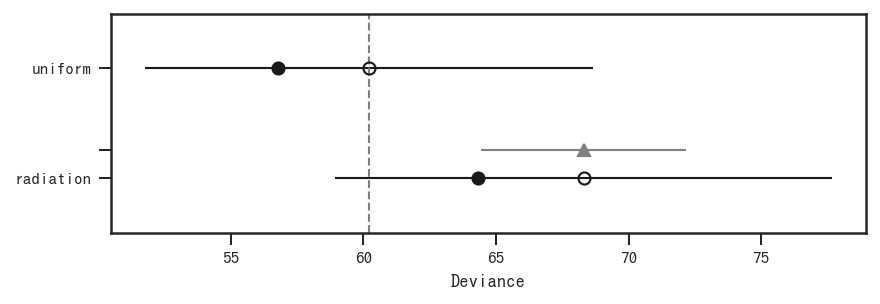

In [59]:
df_comp_WAIC = az.compare(dict([(models[x].name, traces[x]) for x in range(2)]), ic='WAIC', scale='deviance')
pm.compareplot(df_comp_WAIC);
df_comp_WAIC

In [60]:
kernel = 'uniform'
print(colored(kernel,'red'))
predicted_flux = %R -i commuter_fraction -i gdf_locations library(movement); predict(uniformSelection(theta = commuter_fraction), gdf_locations, symmetric = T)

with localconverter(ro.default_converter + pandas2ri.converter):
    pd_from_r_df = ro.conversion.rpy2py(predicted_flux)
    gdf_locations_ = ro.conversion.rpy2py(pd_from_r_df[0]).set_index('location')
    mvm_matrix = np.matrix(np.reshape(ro.conversion.rpy2py(pd_from_r_df[1]),(len(gdf_locations_),len(gdf_locations_))))
      
df_mvm = pd.DataFrame(mvm_matrix,
                      index=gdf_locations_.index.astype('str'),
                      columns=gdf_locations_.index.astype('str'))
df札幌市_mvm = df_mvm.loc[lambda d: d.index=='札幌市'].melt()

df_cases_mvm = gdf_cases.loc[lambda d: ((d.subprefecture!='札幌市')),['subprefecture','n','population']]\
    .merge(df札幌市_mvm.rename(columns={'location':'subprefecture'}),how='left')\
    .fillna(0)
札幌市pop = df_pop.loc[lambda d: d['Unit']=='札幌市','Population'].values[0]

with pm.Model() as model:
    lnβ = pm.Normal('lnβ', -10, 25, testval=-10.)
    
    k = pm.HalfNormal('k', 10)
    pm.NegativeBinomial('likelihood', tt.exp(lnβ)*df_cases_mvm['value'].values, k, 
               observed=df_cases_mvm['n'].values+1e-4)

    trace = pm.sample(2500, tune=10000, init='advi', cores=8, target_accept=0.96)
      
pm.summary(trace)

uniform
Started processing at 2020-04-12 19:32:47 
Progress:

  |======================================================================| 100%
Finished processing at 2020-04-12 19:32:47 
Time taken: 0 seconds



Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 34.172:   6%|▌         | 12056/200000 [00:03<00:49, 3791.60it/s]
Convergence achieved at 12300
Interrupted at 12,299 [6%]: Average Loss = 53.515
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [k, lnβ]
Sampling 8 chains, 0 divergences: 100%|██████████| 100000/100000 [00:24<00:00, 4148.79draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
lnβ,-6.811,0.264,-7.317,-6.327,0.003,0.002,10066.0,10066.0,10678.0,8559.0,1.0
k,5.804,4.999,0.264,15.251,0.058,0.041,7325.0,7325.0,6714.0,9557.0,1.0


In [61]:
xmax = (np.max(df_cases_mvm['value'])//5000+1)*5000
step = xmax/100
xx = np.arange(0,xmax+step,step)

res_ = []
for β in np.exp(trace['lnβ'])[:1000]:
    res_ = np.r_[res_, [β*xx]] if len(res_) > 0 else [β*xx]

In [62]:
yy = np.percentile(np.stack(res_,1),[50,2.5,97.5],axis=1).transpose()

In [63]:
df_cases = df_cases_mvm.merge(df_translation.rename(columns={'jpn':'subprefecture'}),how='left')
df_cases.sort_values('value',ascending=False)

,subprefecture,n,population,value,jpn_short,eng
1,上川総合振興局,8.0,495947,4912.702628,上川,Kamikawa
10,石狩振興局,2.0,422033,4154.550015,石狩,Ishikari (excl.Sapporo)
8,渡島総合振興局,5.0,395365,3883.424440,渡島,Oshima
12,胆振総合振興局,1.0,391990,3849.201151,胆振,Iburi
2,十勝総合振興局,1.0,340088,3325.388508,十勝,Tokachi
11,空知総合振興局,2.0,293770,2861.793258,空知,Sorachi
0,オホーツク総合振興局,4.0,281630,2740.873604,オホーツク,Okhotsk
13,釧路総合振興局,6.0,230748,2236.671709,釧路,Kushiro
4,後志総合振興局,0.0,209584,2028.170716,後志,Shiribeshi
6,根室振興局,0.0,75055,718.905858,根室,Nemuro


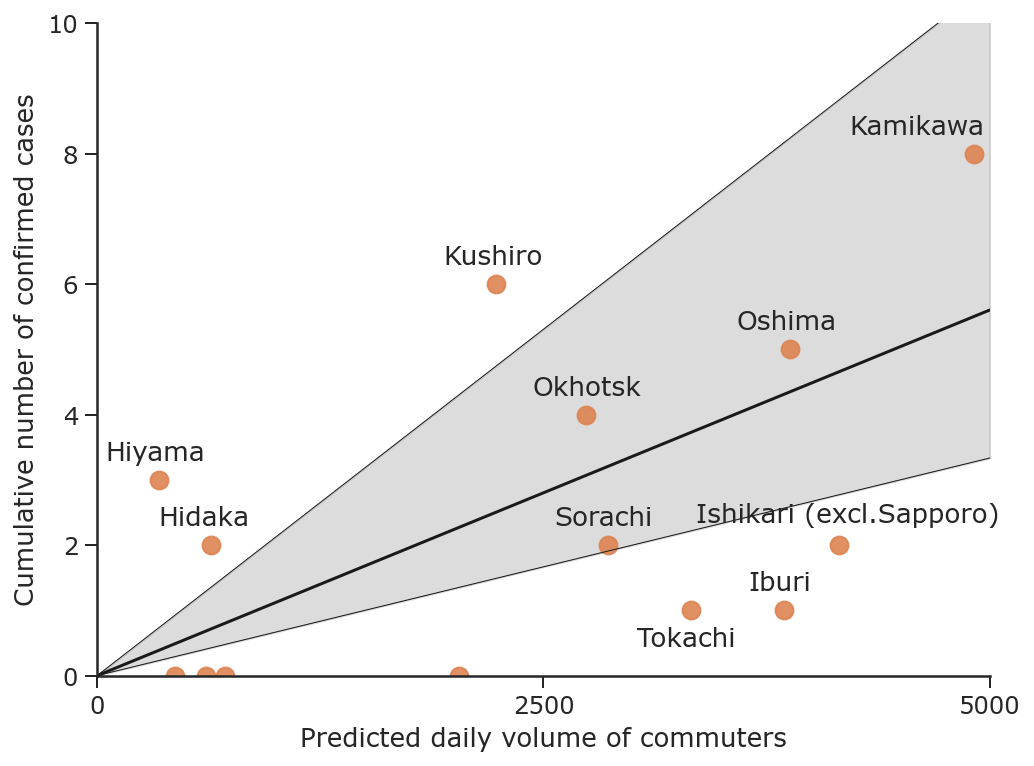

In [72]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_between(xx,yy[:,1],yy[:,2],color='C7',alpha=.3)
ax.plot(xx,yy[:,0],color='k',lw=1.5)
ax.plot(xx,yy[:,1],color='k',lw=.5)
ax.plot(xx,yy[:,2],color='k',lw=.5)

ax.scatter(df_cases['value'],df_cases['n'],color='C1',s=80,alpha=.9)
for idx, txt in enumerate(df_cases['eng']):
    if (df_cases['n'][idx]>0):
        if (txt=='Kamikawa'):
            ax.annotate(txt, (df_cases['value'][idx]-700,df_cases['n'][idx]+.3))
        elif (txt[:4]=='Ishi'):
            ax.annotate(txt, (df_cases['value'][idx]-800,df_cases['n'][idx]+.35))
        elif (txt=='Iburi'):
            ax.annotate(txt, (df_cases['value'][idx]-200,df_cases['n'][idx]+.3))
        elif (txt!='Tokachi'):
            ax.annotate(txt, (df_cases['value'][idx]-300,df_cases['n'][idx]+.3))
        else:
            ax.annotate(txt, (df_cases['value'][idx]-300,df_cases['n'][idx]-.55))

ax.set_xlim(0,xmax+1)
ax.set_xticks(np.arange(0,xmax+2500,2500))
ax.set_ylim(0,10);
ax.set_xlabel("Predicted daily volume of commuters", fontsize=13)
ax.set_ylabel("Cumulative number of confirmed cases", fontsize=13)
ax.spines['left'].set_bounds(0,10)
ax.spines['bottom'].set_bounds(0,xmax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/HokkaidoS1A.pdf", format='pdf');

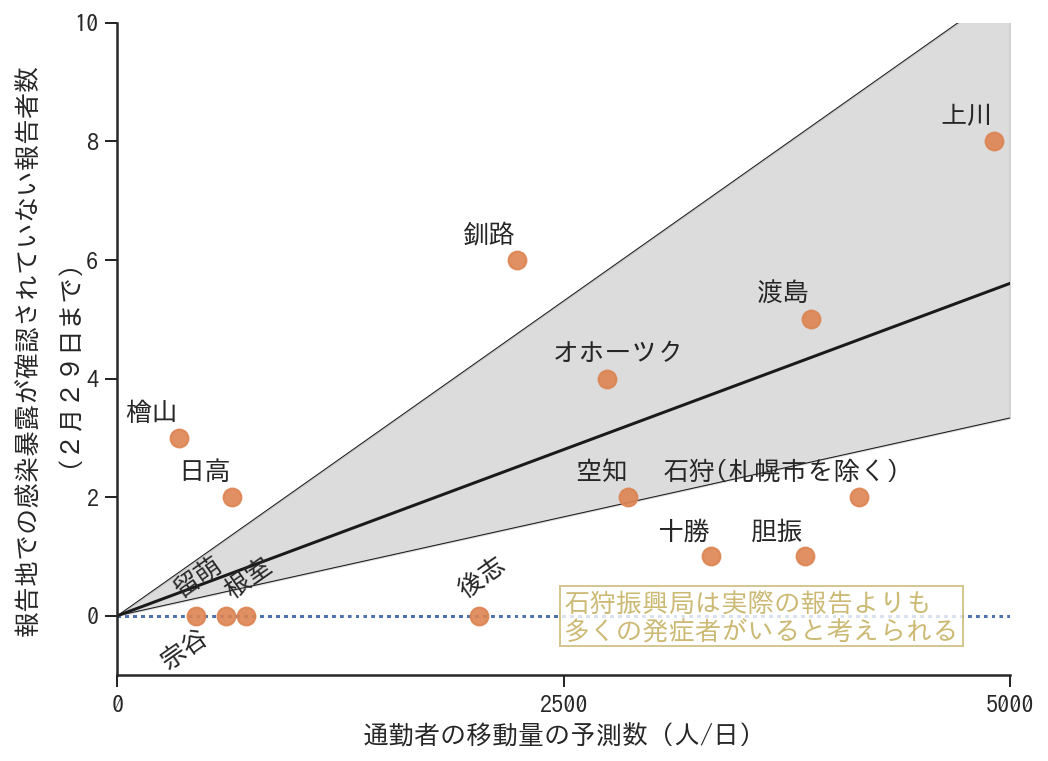

In [65]:
## Japanese version
plt.rcParams["font.family"]="IPAGothic"

fig, ax = plt.subplots(figsize=(8, 6))

xmax = 5000

ax.fill_between(xx,yy[:,1],yy[:,2],color='C7',alpha=.3)
ax.plot(xx,yy[:,0],color='k',lw=1.5)
ax.plot(xx,yy[:,1],color='k',lw=.5)
ax.plot(xx,yy[:,2],color='k',lw=.5)

ax.scatter(df_cases['value'],df_cases['n'],color='C1',s=80,alpha=.9, zorder=10)
for idx, txt in enumerate(df_cases['jpn_short']):
    if (df_cases['n'][idx]>0):
        if (txt!='石狩'):
            ax.annotate(txt, (df_cases['value'][idx]-300,df_cases['n'][idx]+.3))
        else:
            txt = txt+'(札幌市を除く)'
            ax.annotate(txt, (df_cases['value'][idx]-1100,df_cases['n'][idx]+.3))
    else:
        if (txt=='宗谷'):
            ax.annotate(txt, (df_cases['value'][idx]-400,df_cases['n'][idx]-.9), rotation=35)
        else:
            ax.annotate(txt, (df_cases['value'][idx]-150,df_cases['n'][idx]+.3), rotation=35)
            
    ax.axhline(0,ls='dotted',zorder=-5)
    
ax.annotate("石狩振興局は実際の報告よりも\n多くの発症者がいると考えられる",[2500,-.4],color='C8',
            bbox=dict(facecolor='w', edgecolor='C8', alpha=.8,pad=2.0))

ax.set_xlim(0,xmax+1)
ax.set_xticks(np.arange(0,xmax+2500,2500))
ax.set_ylim(-1,10);
ax.set_xlabel("通勤者の移動量の予測数（人/日）", fontsize=13)
ax.set_ylabel("報告地での感染暴露が確認されていない報告者数\n（２月２９日まで）", fontsize=13)
ax.spines['left'].set_bounds(-1,10)
ax.spines['bottom'].set_bounds(0,xmax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/HokkaidoS1A-jpn.pdf", format='pdf');

In [66]:
df_translation

,jpn,jpn_short,eng
0,宗谷総合振興局,宗谷,Soya
1,留萌振興局,留萌,Rumoi
2,根室振興局,根室,Nemuro
3,オホーツク総合振興局,オホーツク,Okhotsk
4,上川総合振興局,上川,Kamikawa
5,空知総合振興局,空知,Sorachi
6,釧路総合振興局,釧路,Kushiro
7,石狩振興局,石狩,Ishikari (excl.Sapporo)
8,十勝総合振興局,十勝,Tokachi
9,札幌市,札幌,Sapporo


In [67]:
gdf_locations_jpn = gdf_locations_.reset_index().merge(df_translation.rename(columns={'jpn':'location'}))
gdf_locations_jpn

,location,population,coordinates.x,coordinates.y,jpn_short,eng
0,宗谷総合振興局,63844.0,1.581728e+07,5.631005e+06,宗谷,Soya
1,留萌振興局,45840.0,1.578784e+07,5.511017e+06,留萌,Rumoi
2,根室振興局,75055.0,1.629173e+07,5.505207e+06,根室,Nemuro
3,オホーツク総合振興局,281630.0,1.599428e+07,5.461394e+06,オホーツク,Okhotsk
4,上川総合振興局,495947.0,1.586265e+07,5.452546e+06,上川,Kamikawa
5,空知総合振興局,293770.0,1.580246e+07,5.373394e+06,空知,Sorachi
6,釧路総合振興局,230748.0,1.607362e+07,5.346856e+06,釧路,Kushiro
7,石狩振興局,422033.0,1.575168e+07,5.335613e+06,石狩,Ishikari (excl.Sapporo)
8,十勝総合振興局,340088.0,1.594909e+07,5.314508e+06,十勝,Tokachi
9,札幌市,1955457.0,1.572384e+07,5.311198e+06,札幌,Sapporo


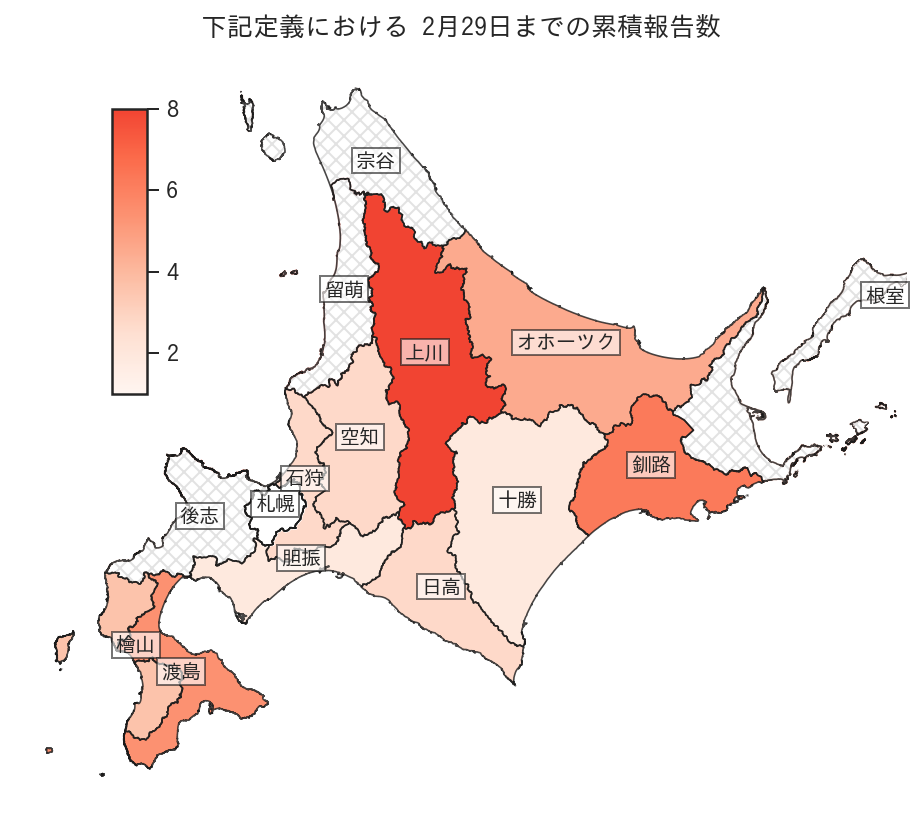

In [68]:
## Japanese version
fig, ax = plt.subplots(figsize=(8, 9))
import matplotlib.colors as colors

vmax = np.max(gdf_cases['n'].dropna().values)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
cmap = plt.get_cmap('Reds')
pllt = truncate_colormap(cmap, 0.0, 0.6)

gdf_cases = gdf_cases.to_crs(epsg=3857)
gdf_cases.loc[lambda d: ((d['n']>0)&(d.subprefecture!='札幌市'))].plot(column='n', axes=ax, edgecolor='none', lw=0, cmap = pllt, 
         categorical=False, legend=False, vmin=0, vmax=vmax)
gdf_cases.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, alpha=.8)
gdf_cases.loc[lambda d: (d.subprefecture=='札幌市')].plot(ax=ax, facecolor='w')
gdf_cases.loc[lambda d: (d.subprefecture=='札幌市')].boundary.plot(ax=ax, edgecolor='k', lw=.8)
gdf_cases.loc[lambda d: ((~(d['n']>0))&(d.subprefecture!='札幌市'))].plot(ax=ax, edgecolor='C7', hatch="xxx", alpha=.25, facecolor='none',
                cmap = pllt, categorical=False, legend=False, vmin=1, vmax=vmax)

ax.set_title('下記定義における 2月29日までの累積報告数',fontsize=13)
ax.axis('off')

for idx, txt in enumerate(gdf_locations_jpn['jpn_short']):
    ax.annotate(txt, (gdf_locations_jpn['coordinates.x'][idx],gdf_locations_jpn['coordinates.y'][idx]),ha='center',
                fontsize=10, bbox=dict(facecolor='w', edgecolor='k', alpha=.6, pad=2.0))

cax = fig.add_axes([.21, 0.53, 0.03, 0.22])
sm = plt.cm.ScalarMappable(cmap=pllt, norm=plt.Normalize(vmin=1, vmax=vmax)); sm._A = []
cbr = fig.colorbar(sm, cax=cax,)

ax.set_xlim(ax.get_xlim()[0]+.02*(ax.get_xlim()[1]-ax.get_xlim()[0]),
            ax.get_xlim()[0]+.73*(ax.get_xlim()[1]-ax.get_xlim()[0]))

plt.savefig("../../results/Andrei/Hokkaido1A-jpn.tiff",
            format='tiff', dpi=300, bbox_inches='tight');

## <font color="green"> Loading another linelist to construct the epicurve</font> 

Linelist is not provided as a supplementary, however, all data was retrieved using publicly available sources.

In [73]:
df_translation_2jpn = df_translation.copy()
df_translation_2jpn.loc[lambda d: [x[:4]=='Ishi' for x in d.eng],'eng'] = 'Ishikari' 

### <font color="brown">As of 28 February 2020</font>

In [142]:
CUTOFF_TIME = pd.to_datetime('2020-02-28')
df_master = pd.read_excel('japan_data_master.xlsx','Sheet1')\
    .loc[:,['DiagnosisGADM2','DiagnosisSub','DateReportedConfirmed','DiagnosisProvince','Onset','ABNumJP','PrefectureIDJP','Nationality']]\
    .loc[lambda d: ((d.DiagnosisProvince=='Hokkaido')&(d.DateReportedConfirmed<=CUTOFF_TIME))]
df_master['ABNumJP_'] = [x[:2] for x in df_master['ABNumJP']]
df_master.loc[lambda d: d.DiagnosisGADM2=='Sapporo','DiagnosisSub'] = 'Sapporo'
df_master = df_master.loc[lambda d: d.ABNumJP_=='A0'].drop(['ABNumJP_'],1).merge(df_translation_2jpn.rename(columns={'eng':'DiagnosisSub'}),how='left')
df_master

,DiagnosisGADM2,DiagnosisSub,DateReportedConfirmed,DiagnosisProvince,Onset,ABNumJP,PrefectureIDJP,Nationality,jpn,jpn_short
0,NaN,NaN,2020-01-28,Hokkaido,2020-01-26,A0007,1,Chinese,NaN,NaN
1,Sapporo,Sapporo,2020-02-14,Hokkaido,2020-01-31,A0027,2,Unknown,札幌市,札幌
2,Sapporo,Sapporo,2020-02-19,Hokkaido,2020-02-08,A0054,3,Japanese,札幌市,札幌
3,Nanae,Oshima,2020-02-19,Hokkaido,2020-02-03,A0055,4,Japanese,渡島総合振興局,渡島
4,Sapporo,Sapporo,2020-02-20,Hokkaido,2020-02-15,A0062,5,Japanese,札幌市,札幌
...,...,...,...,...,...,...,...,...,...,...
60,NaN,Kushiro,2020-02-28,Hokkaido,2020-02-12,A0191,62,Japanese,釧路総合振興局,釧路
61,NaN,Kushiro,2020-02-28,Hokkaido,2020-02-20,A0192,63,Japanese,釧路総合振興局,釧路
62,Sapporo,Sapporo,2020-02-28,Hokkaido,2020-02-26,A0193,64,Japanese,札幌市,札幌
63,Sapporo,Sapporo,2020-02-28,Hokkaido,2020-02-20,A0194,65,Japanese,札幌市,札幌


In [143]:
df_master['A_ID'] = ["A-%03d"%int(x[2:]) for x in df_master['ABNumJP']]
df_master.merge(df_Sungmok.drop(['lat','long','Prefecture','geometry'],1),how='outer')\
    .drop(['jpn','jpn_short','DiagnosisGADM2','DiagnosisProvince','ABNumJP'],1).to_csv("for_Sungmok.csv",index=False)

In [144]:
df_master.drop(['jpn','jpn_short','DiagnosisGADM2'],1).to_csv("for_Sungmok.csv",index=False)

In [145]:
df_Sungmok_ = df_Sungmok.drop(['lat','long','Prefecture','geometry'],1)

In [146]:
df_master_n = df_master.rename(columns={'jpn':'subprefecture'}).groupby('subprefecture').agg(len).loc[:,['jpn_short']].rename(columns={'jpn_short':'n_all'}).reset_index(drop=False)
df_master_n

,subprefecture,n_all
0,オホーツク総合振興局,8
1,上川総合振興局,12
2,十勝総合振興局,1
3,日高振興局,2
4,札幌市,13
5,根室振興局,1
6,檜山振興局,3
7,渡島総合振興局,6
8,石狩振興局,5
9,空知総合振興局,2


In [147]:
gdf_cases_n = gdf_cases.merge(df_master_n,how='left')
gdf_cases_n['n'] = gdf_cases_n['n'].fillna(0)
gdf_cases_n['n_all'] = gdf_cases_n['n_all'].fillna(0)
gdf_cases_n

,subprefecture,geometry,population,n,n_all
0,オホーツク総合振興局,"MULTIPOLYGON (((16062839.987 5466720.904, 1606...",281630,4.0,8.0
1,上川総合振興局,"POLYGON ((15888382.895 5313464.133, 15888373.4...",495947,8.0,12.0
2,十勝総合振興局,"MULTIPOLYGON (((15957649.005 5206222.468, 1595...",340088,1.0,1.0
3,宗谷総合振興局,"MULTIPOLYGON (((15901212.775 5572601.332, 1590...",63844,0.0,0.0
4,後志総合振興局,"MULTIPOLYGON (((15569767.146 5260544.216, 1556...",209584,0.0,0.0
5,日高振興局,"MULTIPOLYGON (((15947388.347 5148299.395, 1594...",66894,2.0,2.0
6,札幌市,"POLYGON ((15706990.691 5329894.777, 15707163.6...",1955457,0.0,13.0
7,根室振興局,"MULTIPOLYGON (((16196555.876 5336110.985, 1619...",75055,0.0,1.0
8,檜山振興局,"MULTIPOLYGON (((15583821.828 5105858.717, 1558...",36168,3.0,3.0
9,渡島総合振興局,"MULTIPOLYGON (((15562393.352 5064381.111, 1556...",395365,5.0,6.0


In [148]:
gdf_cases_n['n_all'].sum()-12

51.0

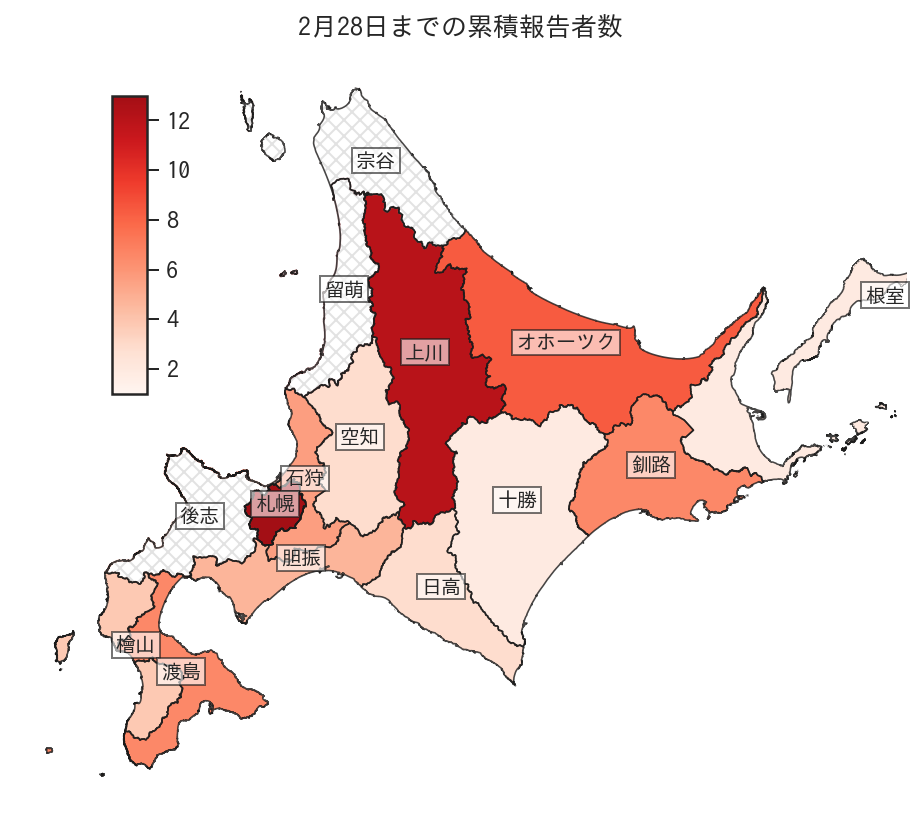

In [149]:
plt.rcParams["font.family"]="IPAGothic"

fig, ax = plt.subplots(figsize=(8, 9))
import matplotlib.colors as colors

vmax = np.max(gdf_cases_n['n_all'].dropna().values)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
cmap = plt.get_cmap('Reds')
pllt = truncate_colormap(cmap, 0.0, 0.9*0.6*13/8)

gdf_cases_n = gdf_cases_n.to_crs(epsg=3857)
gdf_cases_n.loc[lambda d: (d['n_all']>0)].plot(column='n_all', axes=ax, edgecolor='none', lw=0, cmap = pllt, 
         categorical=False, legend=False, vmin=0, vmax=vmax)
gdf_cases_n.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, alpha=.8)
gdf_cases_n.loc[lambda d: (d.subprefecture=='札幌市')].boundary.plot(ax=ax, edgecolor='k', lw=.8)
gdf_cases_n.loc[lambda d: (~(d['n_all']>0))].plot(ax=ax, edgecolor='C7', hatch="xxx", alpha=.25, facecolor='none',
                cmap = pllt, categorical=False, legend=False, vmin=1, vmax=vmax)

ax.set_title('2月28日までの累積報告者数',fontsize=13)
ax.axis('off')

for idx, txt in enumerate(gdf_locations_jpn['jpn_short']):
    ax.annotate(txt, (gdf_locations_jpn['coordinates.x'][idx],gdf_locations_jpn['coordinates.y'][idx]),ha='center',
                fontsize=10, bbox=dict(facecolor='w', edgecolor='k', alpha=.6, pad=2.0))

cax = fig.add_axes([.21, 0.53, 0.03, 0.23])
sm = plt.cm.ScalarMappable(cmap=pllt, norm=plt.Normalize(vmin=1, vmax=vmax)); sm._A = []
cbr = fig.colorbar(sm, cax=cax,)

ax.set_xlim(ax.get_xlim()[0]+.02*(ax.get_xlim()[1]-ax.get_xlim()[0]),
            ax.get_xlim()[0]+.73*(ax.get_xlim()[1]-ax.get_xlim()[0]))

plt.savefig("../../results/Andrei/Hokkaido1A_all_cases-jpn.tiff",
            format='tiff', dpi=300, bbox_inches='tight');

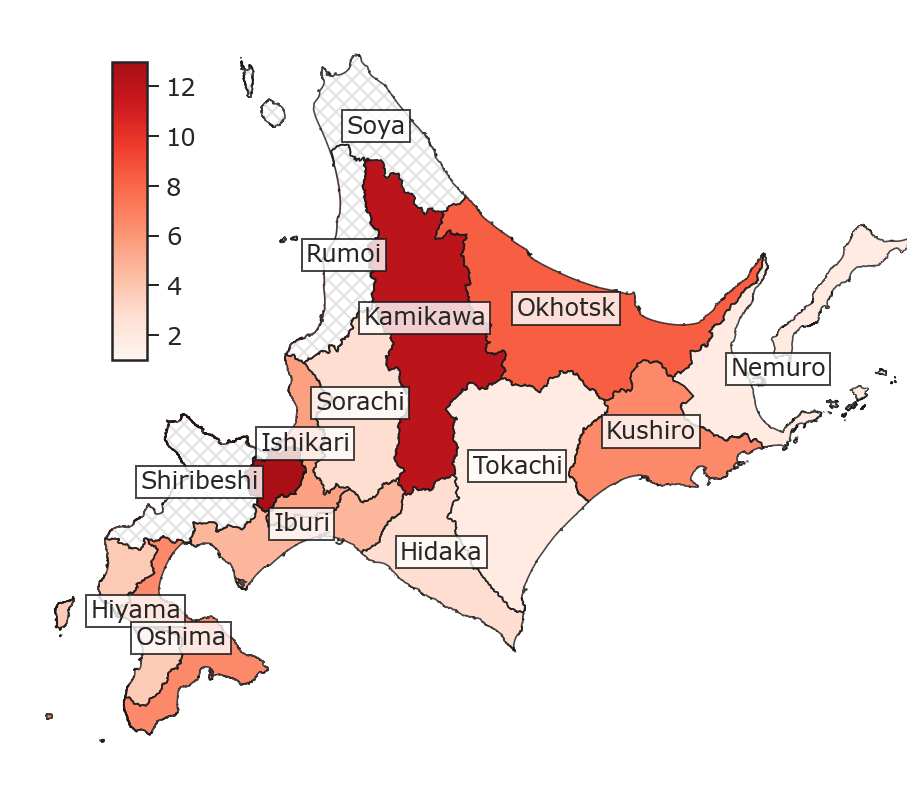

In [150]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(8, 9))
import matplotlib.colors as colors

vmax = np.max(gdf_cases_n['n_all'].dropna().values)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
cmap = plt.get_cmap('Reds')
pllt = truncate_colormap(cmap, 0.0, 13.0/15)

gdf_cases_n = gdf_cases_n.to_crs(epsg=3857)
gdf_cases_n.loc[lambda d: (d['n_all']>0)].plot(column='n_all', axes=ax, edgecolor='none', lw=0, cmap = pllt, 
         categorical=False, legend=False, vmin=0, vmax=vmax)
gdf_cases_n.boundary.plot(ax=ax, edgecolor='k', facecolor='none', lw=.8, alpha=.8)
gdf_cases_n.loc[lambda d: (d.subprefecture=='札幌市')].boundary.plot(ax=ax, edgecolor='k', lw=.8)
gdf_cases_n.loc[lambda d: (~(d['n_all']>0))].plot(ax=ax, edgecolor='C7', hatch="xxx", alpha=.25, facecolor='none',
                cmap = pllt, categorical=False, legend=False, vmin=1, vmax=vmax)

ax.axis('off')

for idx, txt in enumerate(gdf_locations_jpn['eng']):
    if (txt[:4]=='Ishi'):
        txt = txt.split(" (")[0]
    if (txt=='Nemuro'):
        ax.annotate(txt, (gdf_locations_jpn['coordinates.x'][idx]-1e5,gdf_locations_jpn['coordinates.y'][idx]-1e5),ha='center',
            fontsize=12, bbox=dict(facecolor='w', edgecolor='k', alpha=.8, pad=2.0))
    elif (txt!='Sapporo'):
        ax.annotate(txt, (gdf_locations_jpn['coordinates.x'][idx],gdf_locations_jpn['coordinates.y'][idx]),ha='center',
                    fontsize=12, bbox=dict(facecolor='w', edgecolor='k', alpha=.8, pad=2.0))

cax = fig.add_axes([.21, 0.53, 0.03, 0.23])
sm = plt.cm.ScalarMappable(cmap=pllt, norm=plt.Normalize(vmin=1, vmax=vmax)); sm._A = []
cbr = fig.colorbar(sm, cax=cax,)

ax.set_xlim(ax.get_xlim()[0]+.02*(ax.get_xlim()[1]-ax.get_xlim()[0]),
            ax.get_xlim()[0]+.73*(ax.get_xlim()[1]-ax.get_xlim()[0]))

plt.savefig("../../results/Andrei/Hokkaido1A_all_cases.tiff",format='tiff', dpi=300, bbox_inches='tight');

In [151]:
df_onset = df_master.loc[:,['Onset','DateReportedConfirmed','DiagnosisSub']]
datemin = pd.to_datetime('2020-01-28')#np.min(np.r_[df_onset.Onset.dropna().values,df_onset.DateReportedConfirmed.values])
print(datemin)
datemax = CUTOFF_TIME
print(datemax)
df_onset['delta_onset'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset.Onset]
df_onset['delta_onset'] = df_onset.delta_onset.dt.days
df_onset['delta_report'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset.DateReportedConfirmed]
df_onset['delta_report'] = df_onset.delta_report.dt.days
df_onset['tstar'] = np.timedelta64(datemax-datemin,'D').astype('int64') + 1 #CUTOFF TIME: 2020-02-28
df_onset

2020-01-28 00:00:00
2020-02-28 00:00:00


,Onset,DateReportedConfirmed,DiagnosisSub,delta_onset,delta_report,tstar
0,2020-01-26,2020-01-28,NaN,-2.0,0,32
1,2020-01-31,2020-02-14,Sapporo,3.0,17,32
2,2020-02-08,2020-02-19,Sapporo,11.0,22,32
3,2020-02-03,2020-02-19,Oshima,6.0,22,32
4,2020-02-15,2020-02-20,Sapporo,18.0,23,32
...,...,...,...,...,...,...
60,2020-02-12,2020-02-28,Kushiro,15.0,31,32
61,2020-02-20,2020-02-28,Kushiro,23.0,31,32
62,2020-02-26,2020-02-28,Sapporo,29.0,31,32
63,2020-02-20,2020-02-28,Sapporo,23.0,31,32


In [152]:
df_onset.loc[:,['delta_onset','delta_report','tstar']].to_csv('20200228_reporting_delay.csv',index=False)

In [153]:
df_onset_Sungmok = df_Sungmok.loc[:,['Onset','DateReportedConfirmed','Link']]
df_onset_Sungmok['delta_onset'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset_Sungmok.Onset]
df_onset_Sungmok['delta_onset'] = df_onset_Sungmok.delta_onset.dt.days
# df_onset_Sungmok['delta_onset_direct'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset_Sungmok.loc[lambda d: d.Link=='direct'].Onset]
# df_onset_Sungmok['delta_onset_direct'] = df_onset_Sungmok.delta_onset_direct.dt.days
df_onset_Sungmok['delta_report'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset_Sungmok.DateReportedConfirmed]
df_onset_Sungmok['delta_report'] = df_onset_Sungmok.delta_report.dt.days

In [154]:
df_onset_Sungmok.dropna().loc[lambda d: d.Link=='unknown'].delta_onset.values

array([18, 19,  9,  6, 13, 21, 21, 26, 19, 20, 19, 21, 18, 24, 24, 27, 24,
       27, 23, 25, 25, 27, 24, 21, 28, 22, 24, 21, 22, 15, 23])

In [155]:
df_outside = pd.DataFrame([['Japan','2020-02-15','2020-02-22'],['Japan','2020-02-16','2020-02-22'],['Japan','2020-02-20','2020-02-25'],
                           ['Thailand','2020-02-20','2020-02-26'],['Thailand','2020-02-20','2020-02-26'],['Malaysia','2020-02-25','2020-02-27']])
df_outside.columns = ['DiagnosisCountry','Onset','DateReportedConfirmed']
df_outside['Onset'] = pd.to_datetime(df_outside.Onset)
df_outside['DateReportedConfirmed'] = pd.to_datetime(df_outside.DateReportedConfirmed)
df_outside

,DiagnosisCountry,Onset,DateReportedConfirmed
0,Japan,2020-02-15,2020-02-22
1,Japan,2020-02-16,2020-02-22
2,Japan,2020-02-20,2020-02-25
3,Thailand,2020-02-20,2020-02-26
4,Thailand,2020-02-20,2020-02-26
5,Malaysia,2020-02-25,2020-02-27


In [156]:
df_onset_outside = df_outside.copy()
df_onset_outside['delta_onset'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset_outside.Onset]
df_onset_outside['delta_onset'] = df_onset_outside.delta_onset.dt.days
df_onset_outside['delta_report'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset_outside.DateReportedConfirmed]
df_onset_outside['delta_report'] = df_onset_outside.delta_report.dt.days

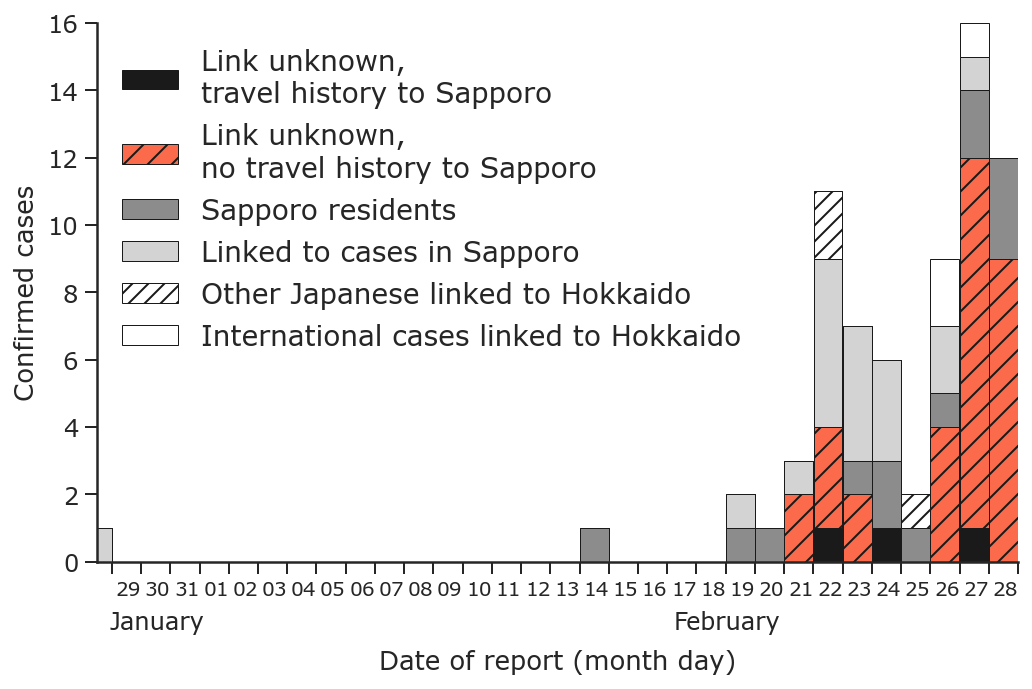

In [157]:
fig, ax = plt.subplots()
fig.set_size_inches(8.25,5.5); 

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2

# from Sungmok
n_infections_Sungmok_direct, edges = np.histogram(df_onset_Sungmok.loc[lambda d: d.Link=='direct'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
timepoints = edges[:-1]
ax.bar(timepoints, n_infections_Sungmok_direct, lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='k', label='Link unknown,\ntravel history to Sapporo')

n_infections_Sungmok_unknown, edges = np.histogram(df_onset_Sungmok.loc[lambda d: d.Link=='unknown'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_Sungmok_unknown, bottom = n_infections_Sungmok_direct,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='#fb6a4a', hatch='//', label='Link unknown,\nno travel history to Sapporo')

# Sapporo residents
n_infections_Sapporo, edges = np.histogram(df_onset.loc[lambda d: d.DiagnosisSub=='Sapporo'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_Sapporo, bottom = n_infections_Sungmok_direct+n_infections_Sungmok_unknown,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor='k', facecolor = 'C7', label='Sapporo residents')

# all cases
n_infections, edges = np.histogram(df_onset.delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections-(n_infections_Sungmok_direct+n_infections_Sungmok_unknown+n_infections_Sapporo), 
       bottom = n_infections_Sungmok_direct+n_infections_Sungmok_unknown+n_infections_Sapporo,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='lightgrey', label='Linked to cases in Sapporo')

# international cases and Japanese outside Hokkaido
n_infections_outside_Japanese, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry=='Japan'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_Japanese, 
       bottom = n_infections,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', hatch='///', label='Other Japanese linked to Hokkaido')

n_infections_outside_international, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry!='Japan'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_international, 
       bottom = n_infections+n_infections_outside_Japanese,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', label='International cases linked to Hokkaido')
ymax = np.max(n_infections_outside_international+n_infections+n_infections_outside_Japanese)

xstep = 5
xtks = np.arange(0,max(timepoints)+1,1)
ax.set_xlim(0,np.max(xtks))
ax.set_ylim(top=ymax)
ax.set_xticks(xtks+.5)
ax.set_xticklabels(np.r_[[""],[((datemin+np.timedelta64(int(x),'D')).strftime("%d")) for x in xtks[1:]]],fontsize=10);
fig.autofmt_xdate(rotation=0,ha='right');

plt.text(0.135, .115, "January", fontsize=12, transform=plt.gcf().transFigure, ha='left')
plt.text(0.7, .115, "February", fontsize=12, transform=plt.gcf().transFigure, ha='right')
plt.legend(frameon=False)

ax.set_xlabel('Date of report (month day)',labelpad=25, fontsize=13)
ax.set_ylabel('Confirmed cases',fontsize=13)

ax.spines['left'].set_bounds(0,ymax)
ax.spines['bottom'].set_bounds(0,np.max(xtks+.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/HokkaidoS2B.pdf",
            format='pdf', bbox_inches='tight');

In [158]:
(n_infections+n_infections_outside_Japanese+n_infections_outside_international).sum()

71

In [159]:
(n_infections_outside_Japanese+n_infections_outside_international).sum()

6

In [160]:
# Diagnosed in Sapporo
df_onset.loc[lambda d: (d.DiagnosisSub=='Sapporo')].shape

(13, 6)

In [161]:
# Diagnosed not in Sapporo
df_onset.loc[lambda d: (d.DiagnosisSub!='Sapporo')&(~pd.isna(d.DiagnosisSub))].shape

(51, 6)

In [162]:
# Unknown place of diagnosis
df_onset.loc[lambda d: (pd.isna(d.DiagnosisSub))].shape

(1, 6)

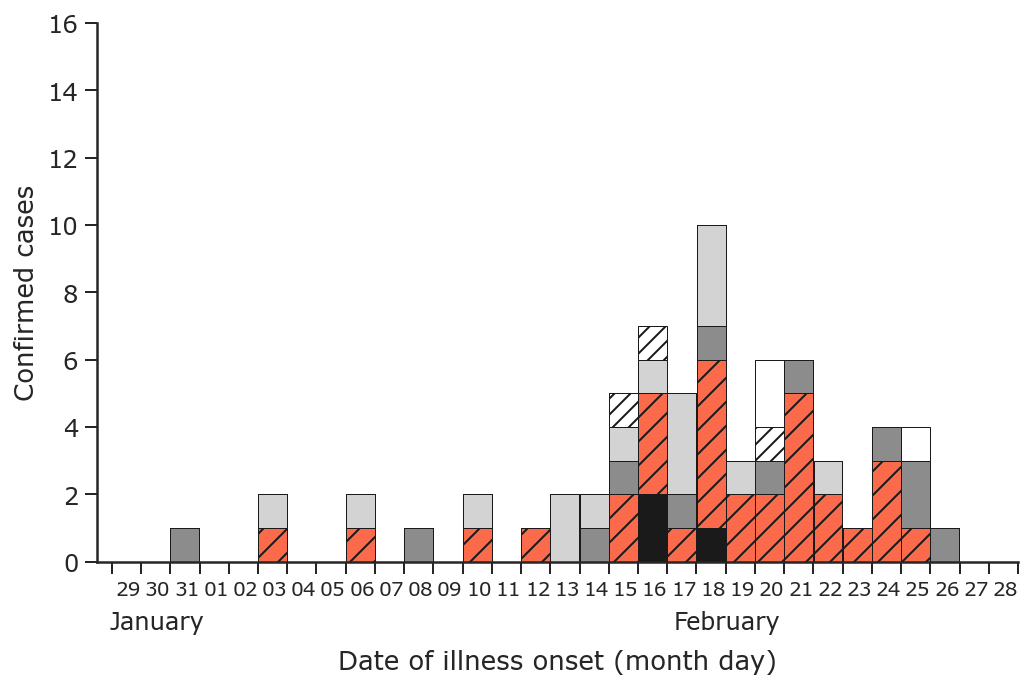

In [163]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
set_plot_style(False)

fig, ax = plt.subplots()
fig.set_size_inches(8.25,5.5); 

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2

# from Sungmok
n_infections_Sungmok_direct, edges = np.histogram(df_onset_Sungmok.dropna().loc[lambda d: d.Link=='direct'].delta_onset.values, bins=bins_number, range=(-1, xmax+1))
timepoints = edges[:-1]
ax.bar(timepoints, n_infections_Sungmok_direct, lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='k', label='Link unknown,\ntravel history to Sapporo')

n_infections_Sungmok_unknown, edges = np.histogram(df_onset_Sungmok.dropna().loc[lambda d: d.Link=='unknown'].delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_Sungmok_unknown, bottom = n_infections_Sungmok_direct,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='#fb6a4a', hatch='//', label='Link unknown,\nno travel history to Sapporo')

# Sapporo residents
n_infections_Sapporo, edges = np.histogram(df_onset.loc[lambda d: d.DiagnosisSub=='Sapporo'].dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_Sapporo, bottom = n_infections_Sungmok_direct+n_infections_Sungmok_unknown,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor='k', facecolor = 'C7', label='Sapporo residents')

# all cases
n_infections, edges = np.histogram(df_onset.dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections-(n_infections_Sungmok_direct+n_infections_Sungmok_unknown+n_infections_Sapporo), 
       bottom = n_infections_Sungmok_direct+n_infections_Sungmok_unknown+n_infections_Sapporo,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='lightgrey', label='Linked to cases in Sapporo')

# international cases and Japanese outside Hokkaido
n_infections_outside_Japanese, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry=='Japan'].dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_Japanese, 
       bottom = n_infections,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', hatch='///', label='Other Japanese linked to Hokkaido')

n_infections_outside_international, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry!='Japan'].dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_international, 
       bottom = n_infections+n_infections_outside_Japanese,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', label='International cases linked to Hokkaido')

xstep = 5
xtks = np.arange(0,max(timepoints)+1,1)
ax.set_xlim(0,np.max(xtks))
ax.set_ylim(top=ymax)
ax.set_xticks(xtks+.5)
ax.set_xticklabels(np.r_[[""], [((datemin+np.timedelta64(int(x),'D')).strftime("%d")) for x in xtks[1:]]],fontsize=10);
fig.autofmt_xdate(rotation=0, ha='right');

plt.text(0.135, .115, "January", fontsize=12, transform=plt.gcf().transFigure, ha='left')
plt.text(0.7, .115, "February", fontsize=12, transform=plt.gcf().transFigure, ha='right')
# plt.legend(frameon=False,loc=2)

ax.set_xlabel('Date of illness onset (month day)',labelpad=25, fontsize=13)
ax.set_ylabel('Confirmed cases',fontsize=13)

ax.spines['left'].set_bounds(0,ymax)
ax.spines['bottom'].set_bounds(0,np.max(xtks+.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/HokkaidoS2A.pdf", format='pdf', bbox_inches='tight');

In [164]:
n_infections_Sapporo

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0])

In [165]:
n_infections-n_infections_Sapporo

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 3, 6, 4,
       9, 3, 2, 5, 3, 1, 3, 1, 0, 0, 0])

In [166]:
(n_infections+n_infections_outside_Japanese+n_infections_outside_international).sum()

68

In [167]:
(n_infections_outside_international).sum()

3

### <font color="brown">As of 5 March 2020</font>

In [168]:
CUTOFF_TIME = pd.to_datetime('2020-03-06')
df_master = pd.read_excel('japan_data_master.xlsx','Sheet1')\
    .loc[:,['DiagnosisGADM2','DiagnosisSub','DateReportedConfirmed','DiagnosisProvince','Onset','ABNumJP','PrefectureIDJP','Nationality']]\
    .loc[lambda d: ((d.DiagnosisProvince=='Hokkaido')&(d.DateReportedConfirmed<=CUTOFF_TIME))]
df_master['ABNumJP_'] = [x[:2] for x in df_master['ABNumJP']]
df_master.loc[lambda d: d.DiagnosisGADM2=='Sapporo','DiagnosisSub'] = 'Sapporo'
df_master = df_master.loc[lambda d: d.ABNumJP_=='A0'].drop(['ABNumJP_'],1).merge(df_translation_2jpn.rename(columns={'eng':'DiagnosisSub'}),how='left')
df_master

,DiagnosisGADM2,DiagnosisSub,DateReportedConfirmed,DiagnosisProvince,Onset,ABNumJP,PrefectureIDJP,Nationality,jpn,jpn_short
0,NaN,NaN,2020-01-28,Hokkaido,2020-01-26,A0007,1,Chinese,NaN,NaN
1,Sapporo,Sapporo,2020-02-14,Hokkaido,2020-01-31,A0027,2,Unknown,札幌市,札幌
2,Sapporo,Sapporo,2020-02-19,Hokkaido,2020-02-08,A0054,3,Japanese,札幌市,札幌
3,Nanae,Oshima,2020-02-19,Hokkaido,2020-02-03,A0055,4,Japanese,渡島総合振興局,渡島
4,Sapporo,Sapporo,2020-02-20,Hokkaido,2020-02-15,A0062,5,Japanese,札幌市,札幌
...,...,...,...,...,...,...,...,...,...,...
84,Sapporo,Sapporo,2020-03-06,Hokkaido,2020-02-26,A0305,86,Japanese,札幌市,札幌
85,Kitahiroshima,Ishikari,2020-03-06,Hokkaido,2020-02-27,A0306,87,Japanese,石狩振興局,石狩
86,NaN,Ishikari,2020-03-06,Hokkaido,2020-02-28,A0307,88,Japanese,石狩振興局,石狩
87,NaN,Okhotsk,2020-03-06,Hokkaido,2020-02-28,A0308,89,Japanese,オホーツク総合振興局,オホーツク


In [169]:
df_master_n = df_master.rename(columns={'jpn':'subprefecture'}).groupby('subprefecture').agg(len).loc[:,['jpn_short']].rename(columns={'jpn_short':'n_all'}).reset_index(drop=False)
df_master_n

,subprefecture,n_all
0,オホーツク総合振興局,15
1,上川総合振興局,15
2,十勝総合振興局,1
3,日高振興局,2
4,札幌市,23
5,根室振興局,1
6,檜山振興局,3
7,渡島総合振興局,6
8,石狩振興局,8
9,空知総合振興局,2


In [170]:
df_master_n.n_all.sum()

87

In [171]:
df_onset = df_master.loc[:,['Onset','DateReportedConfirmed','DiagnosisSub']]
datemin = pd.to_datetime('2020-01-28')#np.min(np.r_[df_onset.Onset.dropna().values,df_onset.DateReportedConfirmed.values])
print(datemin)
datemax = CUTOFF_TIME
print(datemax)
df_onset['delta_onset'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset.Onset]
df_onset['delta_onset'] = df_onset.delta_onset.dt.days
df_onset['delta_report'] = [(x-datemin) if ~(pd.isna(x)) else pd.nat for x in df_onset.DateReportedConfirmed]
df_onset['delta_report'] = df_onset.delta_report.dt.days
df_onset['tstar'] = np.timedelta64(datemax-datemin,'D').astype('int64') + 1 #CUTOFF TIME: 2020-02-29
df_onset

2020-01-28 00:00:00
2020-03-06 00:00:00


,Onset,DateReportedConfirmed,DiagnosisSub,delta_onset,delta_report,tstar
0,2020-01-26,2020-01-28,NaN,-2.0,0,39
1,2020-01-31,2020-02-14,Sapporo,3.0,17,39
2,2020-02-08,2020-02-19,Sapporo,11.0,22,39
3,2020-02-03,2020-02-19,Oshima,6.0,22,39
4,2020-02-15,2020-02-20,Sapporo,18.0,23,39
...,...,...,...,...,...,...
84,2020-02-26,2020-03-06,Sapporo,29.0,38,39
85,2020-02-27,2020-03-06,Ishikari,30.0,38,39
86,2020-02-28,2020-03-06,Ishikari,31.0,38,39
87,2020-02-28,2020-03-06,Okhotsk,31.0,38,39


In [172]:
n_infections

array([ 0,  0,  0,  0,  1,  0,  0,  2,  0,  0,  2,  0,  1,  0,  2,  0,  1,
        2,  2,  4,  6,  5, 10,  3,  3,  6,  3,  1,  4,  3,  1,  0,  0])

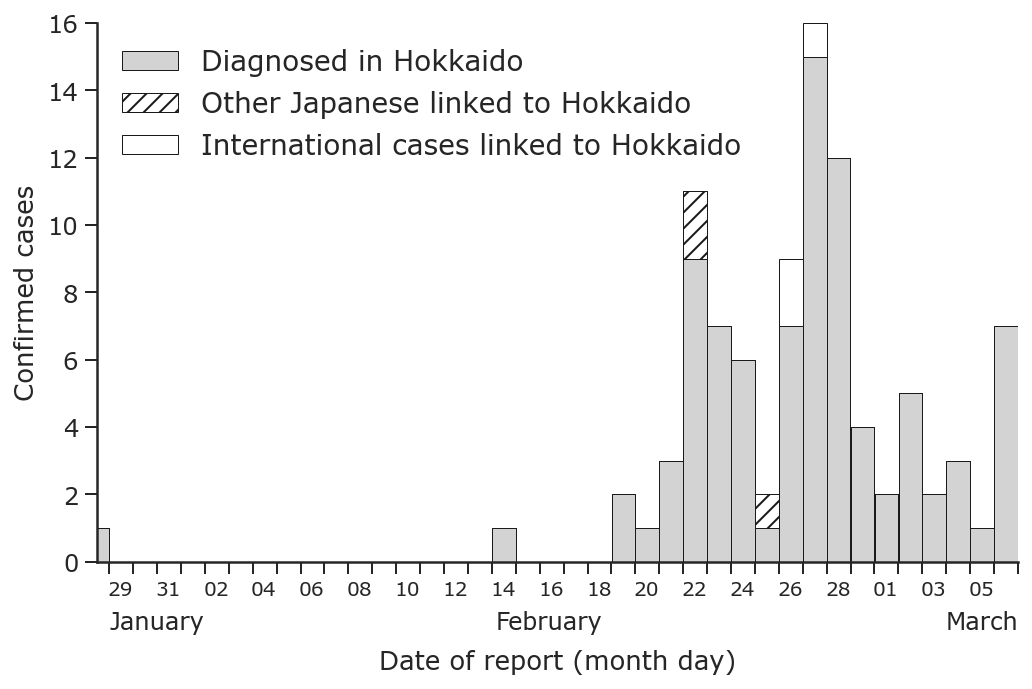

In [173]:
fig, ax = plt.subplots()
fig.set_size_inches(8.25,5.5); 

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2

# all cases
n_infections, edges = np.histogram(df_onset.delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
timepoints = edges[:-1]
ax.bar(timepoints, n_infections, lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='lightgrey', 
       label='Diagnosed in Hokkaido')

# international cases and Japanese outside Hokkaido
n_infections_outside_Japanese, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry=='Japan'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_Japanese, 
       bottom = n_infections,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', hatch='///', label='Other Japanese linked to Hokkaido')

n_infections_outside_international, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry!='Japan'].delta_report.dropna().values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_international, 
       bottom = n_infections+n_infections_outside_Japanese,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', label='International cases linked to Hokkaido')
ymax = np.max(n_infections_outside_international+n_infections+n_infections_outside_Japanese)

xstep = 5
xtks = np.arange(0,max(timepoints)+1,1)
ax.set_xlim(0,np.max(xtks))
ax.set_ylim(top=ymax)
ax.set_xticks(xtks+.5)
ax.set_xticklabels(np.r_[[""],[((datemin+np.timedelta64(int(x),'D')).strftime("%d")) if idx_%2==0 else "" for idx_,x in enumerate(xtks[1:])]],fontsize=10);
fig.autofmt_xdate(rotation=0,ha='right');

plt.text(0.135, .115, "January", fontsize=12, transform=plt.gcf().transFigure, ha='left')
plt.text(0.55, .115, "February", fontsize=12, transform=plt.gcf().transFigure, ha='right')
plt.text(0.9, .115, "March", fontsize=12, transform=plt.gcf().transFigure, ha='right')
plt.legend(frameon=False)

ax.set_xlabel('Date of report (month day)',labelpad=25, fontsize=13)
ax.set_ylabel('Confirmed cases',fontsize=13)

ax.spines['left'].set_bounds(0,ymax)
ax.spines['bottom'].set_bounds(0,np.max(xtks+.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/20200303_Hokkaido1A.pdf",
            format='pdf', bbox_inches='tight');

In [174]:
(n_infections+n_infections_outside_Japanese+n_infections_outside_international).sum()

95

In [175]:
(n_infections_outside_Japanese+n_infections_outside_international).sum()

6

In [176]:
# Diagnosed in Sapporo
df_onset.loc[lambda d: (d.DiagnosisSub=='Sapporo')].shape

(23, 6)

In [177]:
# Diagnosed not in Sapporo
df_onset.loc[lambda d: (d.DiagnosisSub!='Sapporo')&(~pd.isna(d.DiagnosisSub))].shape

(65, 6)

In [178]:
# Unknown place of diagnosis
df_onset.loc[lambda d: (pd.isna(d.DiagnosisSub))].shape

(1, 6)

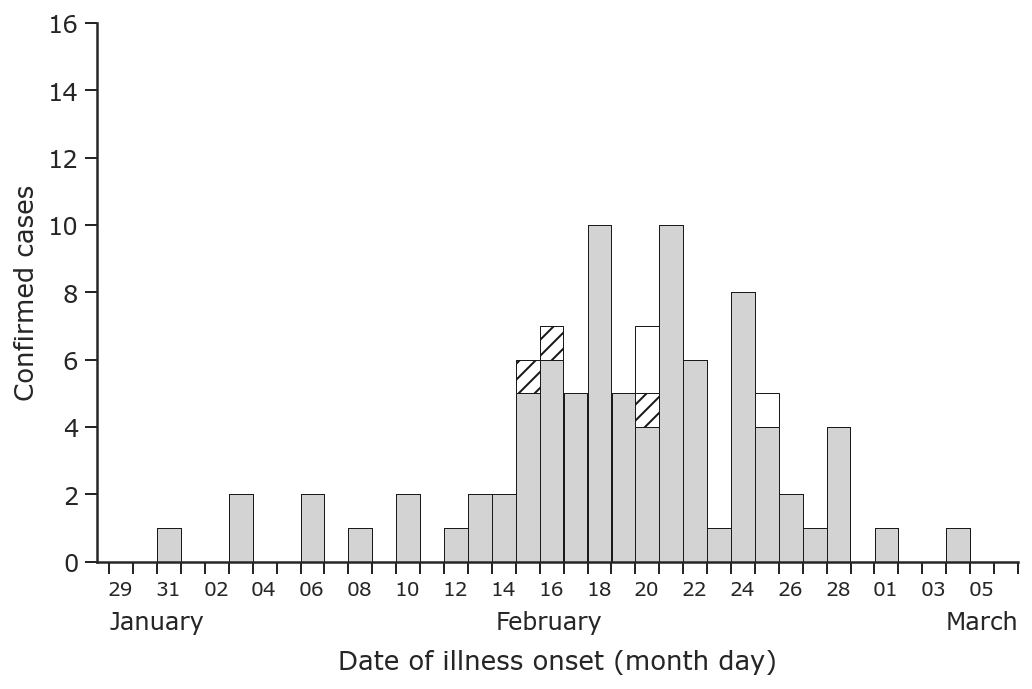

In [179]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
set_plot_style(False)

fig, ax = plt.subplots()
fig.set_size_inches(8.25,5.5); 

xmax = np.timedelta64(datemax-datemin,'D').astype('int64')#np.max(df_onset.dropna().delta_onset.values)
bins_number = int(xmax)+2

# all cases
n_infections, edges = np.histogram(df_onset.dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='lightgrey', label='Linked to cases in Sapporo')

# international cases and Japanese outside Hokkaido
n_infections_outside_Japanese, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry=='Japan'].dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_Japanese, 
       bottom = n_infections,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', hatch='///', label='Other Japanese linked to Hokkaido')

n_infections_outside_international, edges = np.histogram(df_onset_outside[lambda d: d.DiagnosisCountry!='Japan'].dropna().delta_onset.values, bins=bins_number, range=(-1, xmax+1))
ax.bar(timepoints, n_infections_outside_international, 
       bottom = n_infections+n_infections_outside_Japanese,
       lw = 0.5, width = (edges[1]-edges[0])*.99, edgecolor = 'k', color='w', label='International cases linked to Hokkaido')

xstep = 5
xtks = np.arange(0,max(timepoints)+1,1)
ax.set_xlim(0,np.max(xtks))
ax.set_ylim(top=ymax)
ax.set_xticks(xtks+.5)
ax.set_xticklabels(np.r_[[""],[((datemin+np.timedelta64(int(x),'D')).strftime("%d")) if idx_%2==0 else "" for idx_,x in enumerate(xtks[1:])]],fontsize=10);
fig.autofmt_xdate(rotation=0,ha='right');

plt.text(0.135, .115, "January", fontsize=12, transform=plt.gcf().transFigure, ha='left')
plt.text(0.55, .115, "February", fontsize=12, transform=plt.gcf().transFigure, ha='right')
plt.text(0.9, .115, "March", fontsize=12, transform=plt.gcf().transFigure, ha='right')
# plt.legend(frameon=False,loc=2)

ax.set_xlabel('Date of illness onset (month day)',labelpad=25, fontsize=13)
ax.set_ylabel('Confirmed cases',fontsize=13)

ax.spines['left'].set_bounds(0,ymax)
ax.spines['bottom'].set_bounds(0,np.max(xtks+.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.savefig("../../results/Andrei/20200303_Hokkaido1B.pdf",
            format='pdf', bbox_inches='tight');

In [180]:
(n_infections+n_infections_outside_Japanese+n_infections_outside_international).sum()

92

In [181]:
(n_infections_outside_international).sum()

3

## <font color="orange"> Mobility matrix (English version)</font>

In [135]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

plt.rcParams["font.family"]="IPAGothic"

with localconverter(ro.default_converter + pandas2ri.converter):
    pd_from_r_df = ro.conversion.rpy2py(predicted_flux)
    gdf_locations_ = ro.conversion.rpy2py(pd_from_r_df[0]).set_index('location')
    mvm_matrix = np.matrix(np.reshape(ro.conversion.rpy2py(pd_from_r_df[1]),(len(gdf_locations_),len(gdf_locations_))))

df_mvm = pd.DataFrame(mvm_matrix,
                      index=gdf_locations_.index.astype('str'),
                      columns=gdf_locations_.index.astype('str'))
# re-ordering
gdf_locations_ = gdf_locations_.loc[gdf_locations.location]
df_mvm = df_mvm.loc[gdf_locations.location,gdf_locations.location]

In [136]:
df_mvm_eng = df_mvm.reset_index().merge(df_translation.rename(columns={'jpn':'location'}).loc[:,['location','eng']],how='left').set_index('eng').drop('location',1)\
    .transpose().reset_index().merge(df_translation.rename(columns={'jpn':'index'}).loc[:,['index','eng']],how='left').rename(columns={'eng':'location'})\
    .set_index('location').drop('index',1)
df_mvm_eng

,Soya,Rumoi,Nemuro,Okhotsk,Kamikawa,Sorachi,Kushiro,Ishikari (excl.Sapporo),Tokachi,Sapporo,Shiribeshi,Iburi,Hidaka,Hiyama,Oshima
location,,,,,,,,,,,,,,,
Soya,0.000000,11.149930,18.306974,70.107643,126.268413,73.220189,57.147177,106.601552,85.168941,611.011835,51.796136,98.699493,16.303665,8.789292,99.584613
Rumoi,11.149930,0.000000,13.121932,50.252954,90.512210,52.484126,40.962576,76.413537,61.049461,438.120954,37.126866,70.748855,11.686000,6.299881,71.383361
Nemuro,18.306974,13.121932,0.000000,82.505011,148.593410,86.167846,67.253065,125.450355,100.229019,718.905858,60.955883,116.151471,19.187126,10.343796,117.193055
Okhotsk,70.107643,50.252954,82.505011,0.000000,568.554254,329.835756,257.465634,480.077066,383.623628,2740.873604,233.367854,444.519286,73.477809,39.614282,448.502391
Kamikawa,126.268413,90.512210,148.593410,568.554254,0.000000,593.765256,463.548822,863.983091,690.523450,4912.702628,420.181519,800.044113,132.337461,71.351984,807.206843
Sorachi,73.220189,52.484126,86.167846,329.835756,593.765256,0.000000,268.890984,501.369411,400.642111,2861.793258,243.724449,464.236298,76.739951,41.373156,468.395882
Kushiro,57.147177,40.962576,67.253065,257.465634,463.548822,268.890984,0.000000,391.397314,312.747623,2236.671709,190.239767,362.402160,59.894404,32.290550,365.650090
Ishikari (excl.Sapporo),106.601552,76.413537,125.450355,480.077066,863.983091,501.369411,391.397314,0.000000,583.091704,4154.550015,354.774515,675.600202,111.725567,60.237390,681.650582
Tokachi,85.168941,61.049461,100.229019,383.623628,690.523450,400.642111,312.747623,583.091704,0.000000,3325.388508,283.479117,539.913650,89.262970,48.125401,544.750438


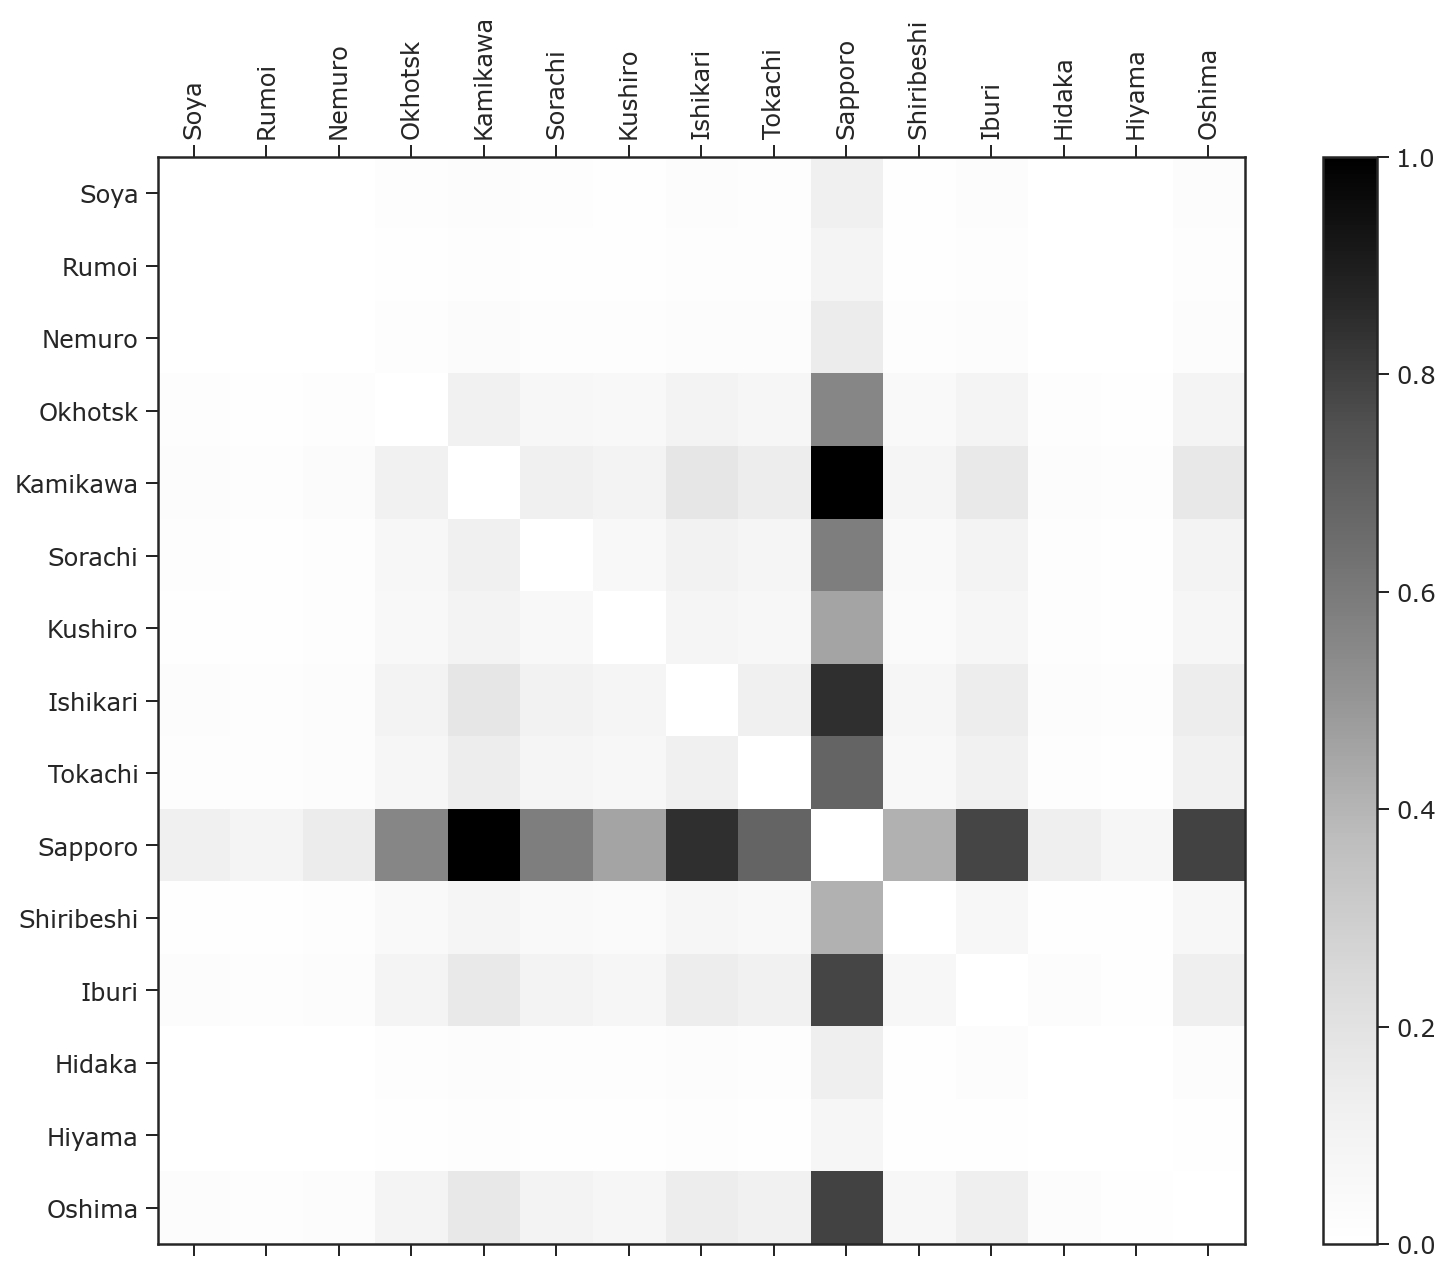

In [137]:
## Mobility matrix = English version
set_plot_style(False)

palette_name = 'Greys'

fig, ax = plt.subplots(figsize=(14, 10))

cax = ax.matshow(df_mvm_eng, cmap=palette_name)
ax.set_xticks(range(len(df_mvm_eng))); ax.set_yticks(range(len(df_mvm_eng))); 
ax.set_xticklabels([x.split(" (")[0] for x in df_mvm_eng.index]);
ax.set_yticklabels([x.split(" (")[0] for x in df_mvm_eng.index]);
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90);

cax = fig.add_axes()
sm = plt.cm.ScalarMappable(cmap=palette_name); sm._A = []
fig.colorbar(sm, cax=cax,);

plt.savefig("../../results/Andrei/HokkaidoS1B.tiff",
            format='tiff', dpi=300, bbox_inches='tight');
plt.savefig("../../results/Andrei/HokkaidoS1B.pdf",
            format='pdf',bbox_inches='tight');

# <font color="purple">Calculating incidence using exportation events outside Hokkaido</font>

In [188]:
df_HN = pd.read_excel("20200304_HN_Kenji results_by report.xlsx", header=None, sheet_name='Scenario1').loc[:,:3]
df_HN.columns = ['Date','mean','q2.5','q97.5']
df_HN['Date'] = pd.to_datetime(df_HN['Date'])
df_HN

,Date,mean,q2.5,q97.5
0,2020-02-22,23.967421,3.985742,74.006138
1,2020-02-25,35.951132,8.941550,93.223539
2,2020-02-27,3446.193819,857.352124,8931.957026


In [189]:
df_Kenji = pd.read_excel("20200304_HN_Kenji results_by report.xlsx", header=None, sheet_name='Scenario2').loc[:,:3]
df_Kenji.columns = ['Date','mean','q2.5','q97.5']
df_Kenji['Date'] = pd.to_datetime(df_Kenji['Date'])
df_Kenji

,Date,mean,q2.5,q97.5
0,2020-02-22,23.967421,3.985742,74.006138
1,2020-02-25,35.951132,8.941550,93.223539
2,2020-02-27,2297.547018,382.145457,7091.150393


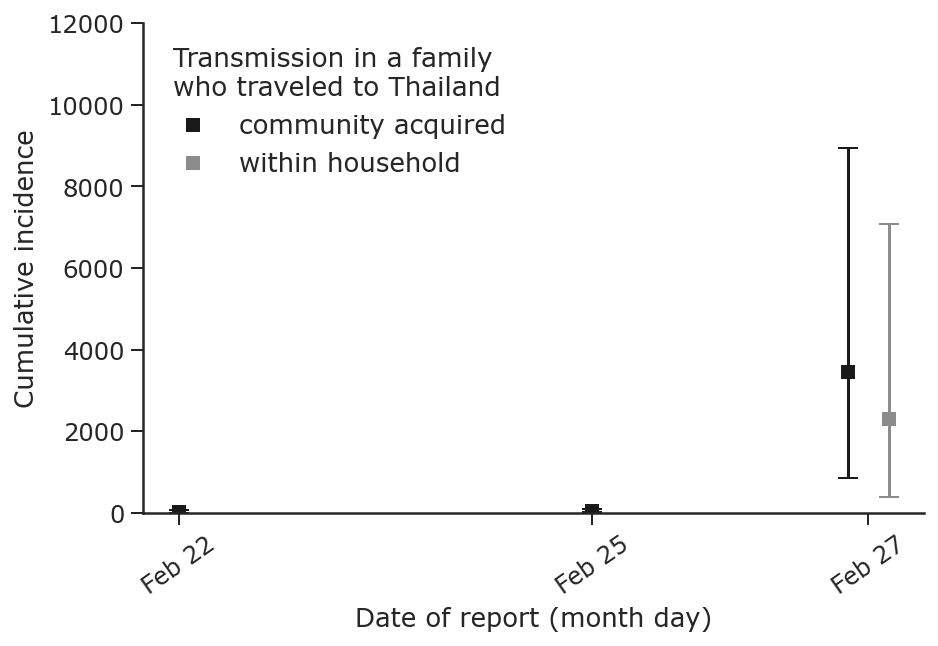

In [190]:
set_plot_style(False)

fig, ax = plt.subplots(figsize=(7, 5))
ymax = 12000

ax.plot_date(df_HN['Date'][:2],df_HN['mean'].values[:2], 's', color='k')
ax.errorbar(df_HN['Date'][:2], (df_HN['q2.5'].values[:2]+df_HN['q97.5'].values[:2])/2, 
                                            yerr=(df_HN['q97.5'].values[:2]-df_HN['q2.5'].values[:2])/2, 
            capsize = 5, marker='s', markersize=0, mfc='w', color='k', zorder=-2, ls='none')

ax.plot_date(df_HN['Date'][2:]-pd.DateOffset(days=.15),df_HN['mean'].values[2:], 's', color='k', label='community acquired')
ax.errorbar(df_HN['Date'][2:]-pd.DateOffset(days=.15), (df_HN['q2.5'].values[2:]+df_HN['q97.5'].values[2:])/2, 
                                            yerr=(df_HN['q97.5'].values[2:]-df_HN['q2.5'].values[2:])/2, 
            capsize = 5, marker='s', markersize=0, mfc='w', color='k', zorder=-2, ls='none')

ax.plot_date(df_Kenji['Date'][2:]+pd.DateOffset(days=.15),df_Kenji['mean'].values[2:], 's', color='C7', label='within household')
ax.errorbar(df_Kenji['Date'][2:]+pd.DateOffset(days=.15), (df_Kenji['q2.5'].values[2:]+df_Kenji['q97.5'].values[2:])/2, 
                                            yerr=(df_Kenji['q97.5'].values[2:]-df_Kenji['q2.5'].values[2:])/2, 
            capsize = 5, marker='s', markersize=0, mfc='w', color='C7', zorder=-2, ls='none')

ax.set_ylim(0,ymax);
# xstep = 0.01; xtks = np.arange(0,xmax+xstep,xstep)
ystep = 2000; ytks = np.arange(0,ymax+ystep,ystep)
# ax.set_xticks(xtks); ax.set_xticklabels([round(100*x,1) for x in xtks])
ax.set_yticks(ytks)
ax.set_xlabel("Date of report (month day)", fontsize=13)
ax.set_ylabel("Cumulative incidence", fontsize=13)
ax.spines['left'].set_bounds(0,ymax)
# ax.spines['bottom'].set_bounds(0,xmax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

from matplotlib.dates import DateFormatter
ax.set_xticks(df_HN['Date'].values)
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
fig.autofmt_xdate(rotation=35,ha='center')

plt.legend(title="Transmission in a family\nwho traveled to Thailand",frameon=False,fontsize=13)

plt.savefig("../../results/Andrei/Hokkaido1D.pdf", format='pdf', bbox_inches='tight');